In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, f1_score, confusion_matrix, accuracy_score,mean_squared_error
from sklearn.metrics import precision_score, recall_score
from sklearn import ensemble, linear_model, neighbors, svm, tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

## Reading and saving the data

In [2]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--",'nan','!','?']
df = pd.read_csv('vaers_jan_nov_2021.csv', na_values=missing_value_formats, engine='python')
df = df.loc[df['STATE'] == 'CA'].reset_index(drop=True)

In [3]:
df.columns


Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE',
       'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'VAX_NAME', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [4]:
df.shape

(86381, 52)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86381 entries, 0 to 86380
Data columns (total 52 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         86381 non-null  int64  
 1   SYMPTOM1         86381 non-null  object 
 2   SYMPTOMVERSION1  86381 non-null  float64
 3   SYMPTOM2         68469 non-null  object 
 4   SYMPTOMVERSION2  68469 non-null  float64
 5   SYMPTOM3         53482 non-null  object 
 6   SYMPTOMVERSION3  53482 non-null  float64
 7   SYMPTOM4         40583 non-null  object 
 8   SYMPTOMVERSION4  40583 non-null  float64
 9   SYMPTOM5         30533 non-null  object 
 10  SYMPTOMVERSION5  30533 non-null  float64
 11  VAX_TYPE         86381 non-null  object 
 12  VAX_MANU         86381 non-null  object 
 13  VAX_LOT          64008 non-null  object 
 14  VAX_DOSE_SERIES  85866 non-null  object 
 15  VAX_ROUTE        70218 non-null  object 
 16  VAX_SITE         69125 non-null  object 
 17  VAX_NAME    

In [6]:
percentage_missing = (round(df.isnull().  sum() * 100/ len(df),2).sort_values(ascending=False))
display(pd.DataFrame({'Missing Percentage' :percentage_missing}));

,Missing Percentage
ER_VISIT,100.00
RPT_DATE,99.99
V_FUNDBY,99.98
X_STAY,99.94
BIRTH_DEFECT,99.89
CAGE_MO,99.83
DATEDIED,99.04
DIED,98.94
L_THREAT,97.44
DISABLE,96.88


In [7]:
percentage_missing.loc[percentage_missing>50].count()

21

In [8]:
(df.duplicated(['VAERS_ID'])).sum()

25025

### Characterization and Dataset Overview
According to the above analysis, the dataset consists of 890836 observations and 52 features/ dimensions. The features are combination of numerical (12 columns), Date (6) and object (34 columns). 80% of the total features has null values and 21 columns has more than 50% missing values. Some of the columns datatypes are not as expected, like VAX_DOSE_SERIES, should have been a numerical but reported as object and Age is preferred to be an Integer instead of a float as an examples.

We studied the dataset and the data dictionary and understand the information and relationship of the columns to each other ( see the note from the data dictionary). We are to drop columns that are not relevant to the business model and have very high count of null values. This will remove noise while performing the data preparation and will save time too.

Now I will break down the data into it's individual values.

In [9]:
df = df.reset_index(level=0)

### Dropping Irrelevant Columns

In [10]:
df.head()

,index,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,0,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
1,1,916612,Ear pain,24.0,Hypoaesthesia,24.0,NaN,NaN,NaN,NaN,...,none,Graves Disease,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,"penicillin, toradol, methimazole"
2,2,916613,Abdominal pain upper,23.1,Dizziness,23.1,Dysgeusia,23.1,NaN,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,None
3,3,916617,Chills,23.1,Dizziness,23.1,Injection site pain,23.1,Myalgia,23.1,...,NaN,Depression,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,None
4,4,916621,Chills,23.1,Fatigue,23.1,Headache,23.1,Myalgia,23.1,...,None,None.,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Ceftiaxone (Rocephin)


In [11]:
df.columns

Index(['index', 'VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE',
       'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'VAX_NAME', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [12]:
df = df.filter(['VAERS_ID', 'SYMPTOM1', 'SYMPTOM2',
       'SYMPTOM3', 'SYMPTOM4',
       'SYMPTOM5',
       'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'STATE', 'AGE_YRS', 'CAGE_YR', 'SEX',
       'DIED','L_THREAT',
       'HOSPITAL', 'HOSPDAYS','TODAYS_DATE','DISABLE', 'RECOVD',
       'NUMDAYS','OFC_VISIT', 'ER_ED_VISIT',], axis = 1).fillna(np.nan)

In [13]:
df.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,...,DIED,L_THREAT,HOSPITAL,HOSPDAYS,TODAYS_DATE,DISABLE,RECOVD,NUMDAYS,OFC_VISIT,ER_ED_VISIT
0,916601,Anxiety,Dyspnoea,NaN,NaN,NaN,MODERNA,1,IM,RA,...,NaN,NaN,NaN,NaN,01/01/2021,NaN,Y,0.0,Y,NaN
1,916612,Ear pain,Hypoaesthesia,NaN,NaN,NaN,MODERNA,1,IM,LA,...,NaN,NaN,NaN,NaN,01/01/2021,NaN,U,0.0,NaN,NaN
2,916613,Abdominal pain upper,Dizziness,Dysgeusia,NaN,NaN,MODERNA,1,SYR,LA,...,NaN,NaN,NaN,NaN,01/01/2021,NaN,U,0.0,NaN,NaN
3,916617,Chills,Dizziness,Injection site pain,Myalgia,Pyrexia,PFIZER\BIONTECH,1,IM,LA,...,NaN,NaN,NaN,NaN,01/01/2021,NaN,Y,0.0,NaN,NaN
4,916621,Chills,Fatigue,Headache,Myalgia,NaN,MODERNA,1,SYR,LA,...,NaN,NaN,NaN,NaN,01/01/2021,NaN,N,0.0,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86381 entries, 0 to 86380
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         86381 non-null  int64  
 1   SYMPTOM1         86381 non-null  object 
 2   SYMPTOM2         68469 non-null  object 
 3   SYMPTOM3         53482 non-null  object 
 4   SYMPTOM4         40583 non-null  object 
 5   SYMPTOM5         30533 non-null  object 
 6   VAX_MANU         86381 non-null  object 
 7   VAX_DOSE_SERIES  85866 non-null  object 
 8   VAX_ROUTE        70218 non-null  object 
 9   VAX_SITE         69125 non-null  object 
 10  STATE            86381 non-null  object 
 11  AGE_YRS          80831 non-null  float64
 12  CAGE_YR          72892 non-null  float64
 13  SEX              86381 non-null  object 
 14  DIED             918 non-null    object 
 15  L_THREAT         2213 non-null   object 
 16  HOSPITAL         6527 non-null   object 
 17  HOSPDAYS    

### Symptoms Text Processing

In [15]:
(df.duplicated(['VAERS_ID'])).sum()

25025

First I will remove the duplicates while retaining the id,

Defined which columns to concatenate

Created a different Data Frame for the text processing

In [16]:
grp = df.groupby(['VAERS_ID']) 
concat = ['SYMPTOM1', 'SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']
df_text = pd.concat([grp[c].apply(set) for c in concat], axis=1).reset_index() 

In [17]:
df_text.head(20)

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916601,{Anxiety},{Dyspnoea},{nan},{nan},{nan}
1,916612,{Ear pain},{Hypoaesthesia},{nan},{nan},{nan}
2,916613,{Abdominal pain upper},{Dizziness},{Dysgeusia},{nan},{nan}
3,916617,{Chills},{Dizziness},{Injection site pain},{Myalgia},{Pyrexia}
4,916621,{Chills},{Fatigue},{Headache},{Myalgia},{nan}
5,916690,{Chills},{Pain},{Pain in extremity},{nan},{nan}
6,916694,{Injection site erythema},{Injection site pain},{Injection site swelling},{Pruritus},{nan}
7,916714,"{Pyrexia, Fatigue}","{nan, Lymph node pain}","{nan, Lymphadenopathy}","{Pain, nan}","{Pain in extremity, nan}"
8,916743,{Tinnitus},{nan},{nan},{nan},{nan}
9,916760,"{Vomiting, Headache}","{nan, Nausea}","{Pain, nan}","{Pyrexia, nan}","{Urticaria, nan}"


In [18]:
df_text['SYMPTOM1'] = df_text['SYMPTOM1'].fillna('').astype(str).str.lower().replace(r'[{}]','',regex=True)
df_text['SYMPTOM1'] = df_text['SYMPTOM1'].fillna('').astype(str).str.replace("'",'',regex=True)
df_text['SYMPTOM2'] = df_text['SYMPTOM2'].fillna('').astype(str).str.lower().str.replace(r'[{}]', '', regex=True)
df_text['SYMPTOM2'] = df_text['SYMPTOM2'].fillna('').astype(str).str.replace("'",'',regex=True)
df_text['SYMPTOM3'] = df_text['SYMPTOM3'].fillna('').astype(str).str.lower().str.replace(r'[{}]', '', regex=True)
df_text['SYMPTOM3'] = df_text['SYMPTOM3'].fillna('').astype(str).str.replace("'",'',regex=True)
df_text['SYMPTOM4'] = df_text['SYMPTOM4'].fillna('').astype(str).str.lower().str.replace(r'[{}]', '', regex=True)
df_text['SYMPTOM4'] = df_text['SYMPTOM4'].fillna('').astype(str).str.replace("'",'',regex=True)
df_text['SYMPTOM5'] = df_text['SYMPTOM5'].fillna('').astype(str).str.lower().str.replace(r'[{}]', '', regex=True)
df_text['SYMPTOM5'] = df_text['SYMPTOM5'].fillna('').astype(str).str.replace("'",'',regex=True)

In [19]:
df_text.head(10)

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916601,anxiety,dyspnoea,nan,nan,nan
1,916612,ear pain,hypoaesthesia,nan,nan,nan
2,916613,abdominal pain upper,dizziness,dysgeusia,nan,nan
3,916617,chills,dizziness,injection site pain,myalgia,pyrexia
4,916621,chills,fatigue,headache,myalgia,nan
5,916690,chills,pain,pain in extremity,nan,nan
6,916694,injection site erythema,injection site pain,injection site swelling,pruritus,nan
7,916714,"pyrexia, fatigue","nan, lymph node pain","nan, lymphadenopathy","pain, nan","pain in extremity, nan"
8,916743,tinnitus,nan,nan,nan,nan
9,916760,"vomiting, headache","nan, nausea","pain, nan","pyrexia, nan","urticaria, nan"


In [20]:
df_text['combine'] = df_text.agg('{0[SYMPTOM1]},{0[SYMPTOM2]},{0[SYMPTOM3]},{0[SYMPTOM4]},{0[SYMPTOM5]}'.format, axis=1)

In [21]:
df_text['combine'] = df_text['combine'].str.replace(',nan','')
df_text['combine'] = df_text['combine'].str.replace(', nan','')
df_text['combine'] = df_text['combine'].str.replace(', ',',')
df_text['combine'] = df_text['combine'].str.strip()

In [22]:
df_text.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,combine
0,916601,anxiety,dyspnoea,nan,nan,nan,"anxiety,dyspnoea"
1,916612,ear pain,hypoaesthesia,nan,nan,nan,"ear pain,hypoaesthesia"
2,916613,abdominal pain upper,dizziness,dysgeusia,nan,nan,"abdominal pain upper,dizziness,dysgeusia"
3,916617,chills,dizziness,injection site pain,myalgia,pyrexia,"chills,dizziness,injection site pain,myalgia,p..."
4,916621,chills,fatigue,headache,myalgia,nan,"chills,fatigue,headache,myalgia"


In [23]:
df_text['WORD_COUNT'] = (df_text['combine'].str.count('\,')) + 1

In [24]:
df_text.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,combine,WORD_COUNT
0,916601,anxiety,dyspnoea,nan,nan,nan,"anxiety,dyspnoea",2
1,916612,ear pain,hypoaesthesia,nan,nan,nan,"ear pain,hypoaesthesia",2
2,916613,abdominal pain upper,dizziness,dysgeusia,nan,nan,"abdominal pain upper,dizziness,dysgeusia",3
3,916617,chills,dizziness,injection site pain,myalgia,pyrexia,"chills,dizziness,injection site pain,myalgia,p...",5
4,916621,chills,fatigue,headache,myalgia,nan,"chills,fatigue,headache,myalgia",4


### Check the different values in each feature

To better understand each symptom, I will now use df[col].unique in order to visualize every unique value in each column

In [25]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  VAERS_ID :
[ 916601  916612  916613 ... 1845795 1845797 1845799]


COLUMN NAME:  SYMPTOM1 :
['Anxiety' 'Ear pain' 'Abdominal pain upper' ...
 'Beta-2 glycoprotein antibody positive' 'Plantar fasciitis'
 'Genital burning sensation']


COLUMN NAME:  SYMPTOM2 :
['Dyspnoea' 'Hypoaesthesia' 'Dizziness' ... 'Anorexia nervosa'
 'Palatal oedema' 'Obstructive airways disorder']


COLUMN NAME:  SYMPTOM3 :
[nan 'Dysgeusia' 'Injection site pain' ... 'Face and mouth X-ray abnormal'
 'Blood uric acid increased' 'Corneal lesion']


COLUMN NAME:  SYMPTOM4 :
[nan 'Myalgia' 'Pruritus' ... 'Placental infarction'
 'VIth nerve paralysis' 'Corneal oedema']


COLUMN NAME:  SYMPTOM5 :
[nan 'Pyrexia' 'Pain in extremity' ... 'Tongue biting'
 'Type 1 diabetes mellitus' 'VIth nerve paralysis']


COLUMN NAME:  VAX_MANU :
['MODERNA' 'PFIZER\\BIONTECH' 'UNKNOWN MANUFACTURER' 'JANSSEN']


COLUMN NAME:  VAX_DOSE_SERIES :
['1' 'UNK' '2' '6' nan '7+' '5' '3' '4']


COLUMN NAME:  VAX_ROUTE :
['IM' 'SYR' nan

### NLTK (Natural Language Toolkit) : Symptoms Anaysis

In [26]:
symptoms= pd.DataFrame(df_text['combine'].str.split(',').explode().tolist(), columns=['Symptoms'])

In [27]:
symptoms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267418 entries, 0 to 267417
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Symptoms  267418 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [28]:
from nltk.probability import FreqDist
fdist = FreqDist(symptoms['Symptoms'])
top_20 = fdist.most_common(20)

In [29]:
lists = pd.DataFrame(top_20, columns=['Symptoms','Count'])
lists.head(20)

,Symptoms,Count
0,headache,10363
1,fatigue,8445
2,dizziness,7917
3,pyrexia,7825
4,pain,7291
5,chills,7067
6,nausea,6293
7,pain in extremity,5846
8,dyspnoea,3600
9,injection site pain,3491


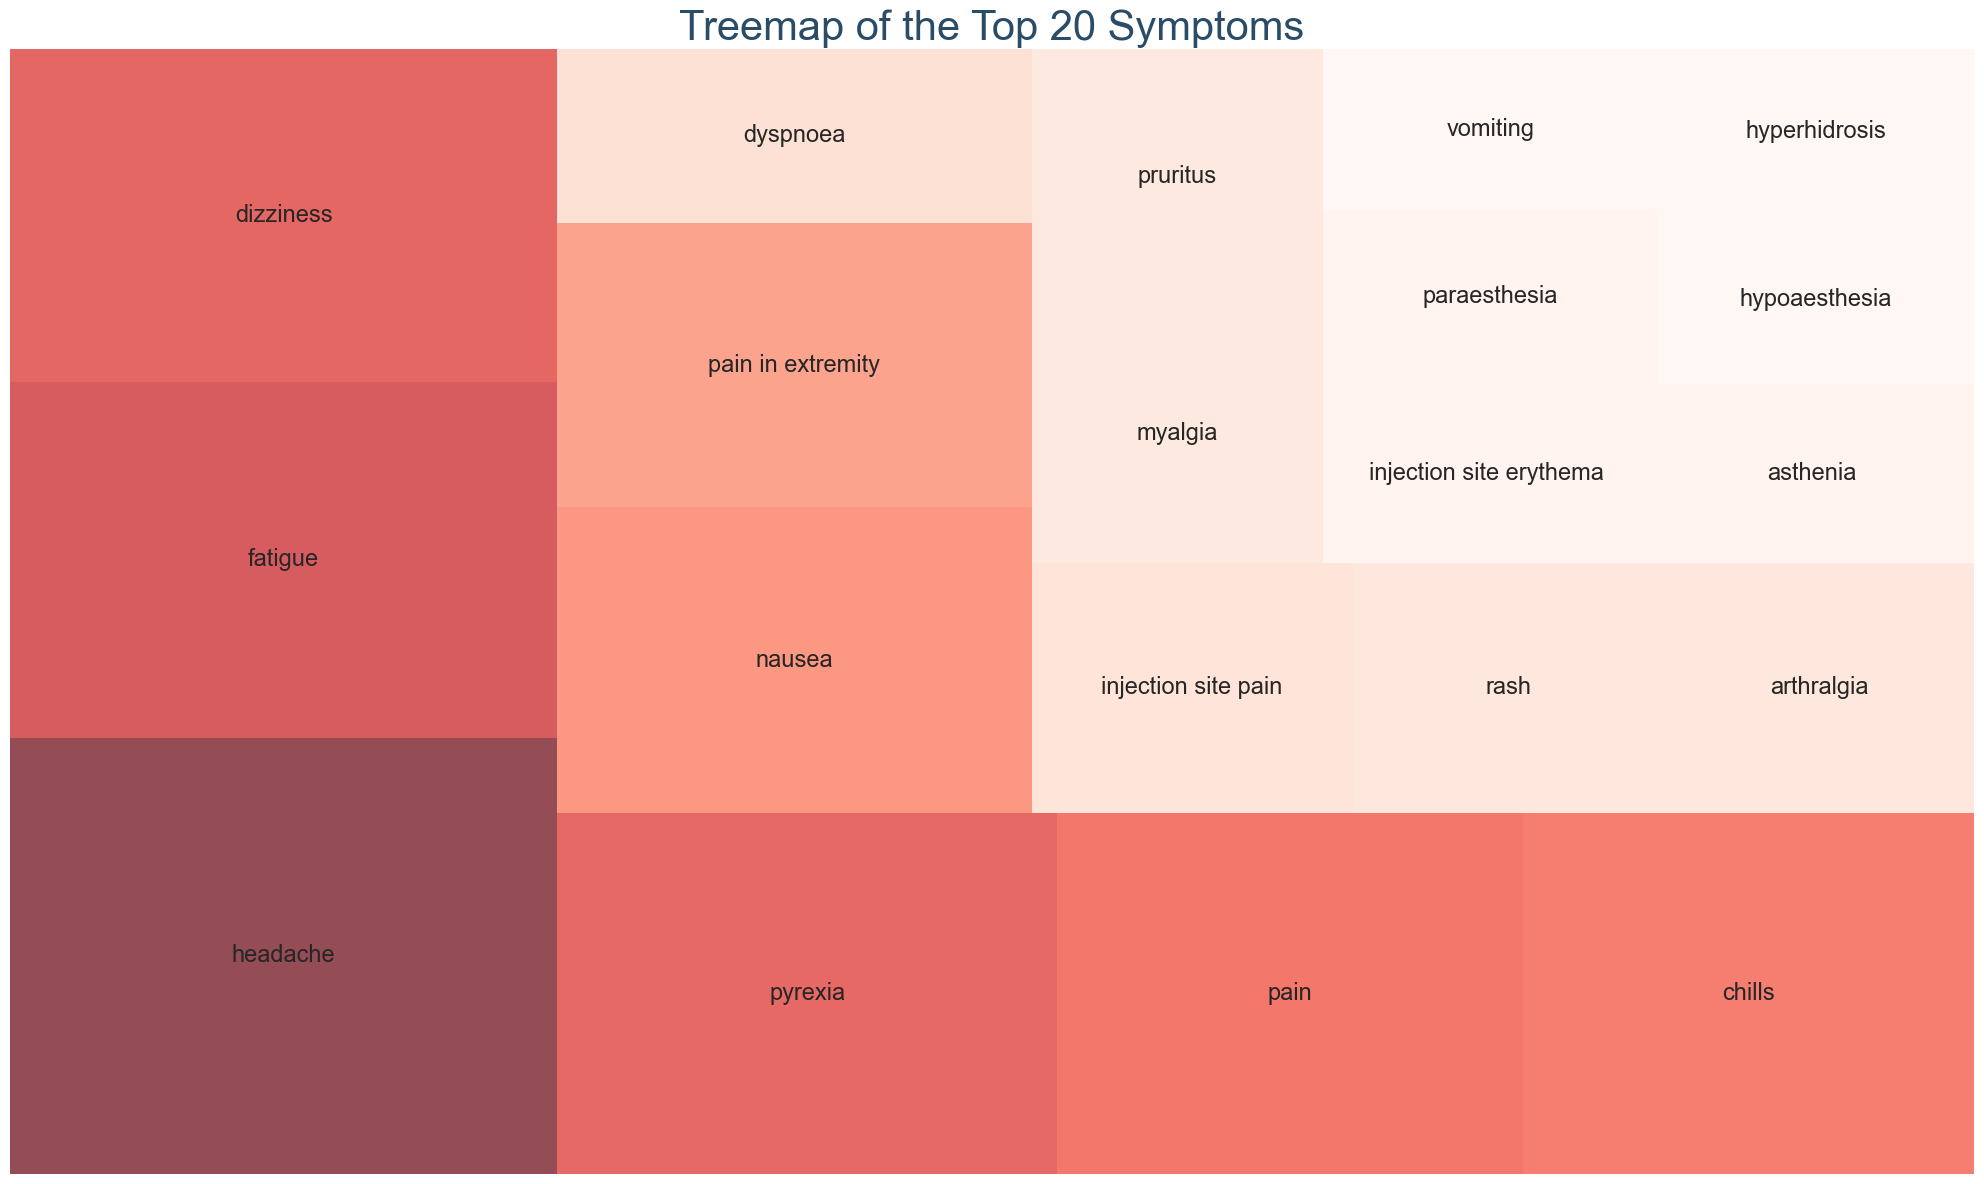

In [30]:
import squarify 
import matplotlib

plt.figure(figsize=(20,12))

my_values = lists.Count
cmap = matplotlib.cm.Reds
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

squarify.plot(sizes=lists.Count, label=lists.Symptoms, alpha=0.7,
             text_kwargs={'fontsize':17},color=colors,)

plt.text(50,100,'Treemap of the Top 20 Symptoms', fontsize = 30, horizontalalignment='center',
        verticalalignment='bottom',zorder = 30,color='#2a4c66')

plt.axis('off')
plt.tight_layout()
plt.show()

### Data Cleaning

Using the top 20 symptoms to filter the SYMPTOMS1

In [31]:
mask = lists['Symptoms'].tolist()

In [32]:
lists['Symptoms'].tolist()

['headache',
 'fatigue',
 'dizziness',
 'pyrexia',
 'pain',
 'chills',
 'nausea',
 'pain in extremity',
 'dyspnoea',
 'injection site pain',
 'rash',
 'arthralgia',
 'myalgia',
 'pruritus',
 'injection site erythema',
 'asthenia',
 'paraesthesia',
 'vomiting',
 'hypoaesthesia',
 'hyperhidrosis']

In [33]:
df['SYMPTOM1'] = df['SYMPTOM1'].str.lower()

In [34]:
df= df[df['SYMPTOM1'].isin(lists['Symptoms'].tolist())]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30171 entries, 3 to 86372
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         30171 non-null  int64  
 1   SYMPTOM1         30171 non-null  object 
 2   SYMPTOM2         25809 non-null  object 
 3   SYMPTOM3         20452 non-null  object 
 4   SYMPTOM4         15264 non-null  object 
 5   SYMPTOM5         10890 non-null  object 
 6   VAX_MANU         30171 non-null  object 
 7   VAX_DOSE_SERIES  29989 non-null  object 
 8   VAX_ROUTE        24591 non-null  object 
 9   VAX_SITE         24993 non-null  object 
 10  STATE            30171 non-null  object 
 11  AGE_YRS          28762 non-null  float64
 12  CAGE_YR          25971 non-null  float64
 13  SEX              30171 non-null  object 
 14  DIED             103 non-null    object 
 15  L_THREAT         274 non-null    object 
 16  HOSPITAL         818 non-null    object 
 17  HOSPDAYS    

### Findings for the Data Preparation
Findings:

TODAYS_DATE will be converted to datetime and use only 2021 data.

VAX_DOSE_SERIES should be numerical value (INT), need further checking and conversion.

HOSPDAYS, HOSPDAYS and NUMDAYS will be converted to INT.

AGE_YRS and CAGE_YR will be converted to INT, the CAGE_YR will be used to impute missing values to AGE_YRS and then will be dropped.

Rest of the columns with null values needs to be addressed.

#### Fixing the TODAYS_DATE

In [36]:
df['TODAYS_DATE'] = pd.to_datetime(df['TODAYS_DATE'])

In [37]:
df = df[(df['TODAYS_DATE'].dt.year == 2021)]
df.describe(include='datetime')

,TODAYS_DATE
count,30075
unique,309
top,2021-08-12 00:00:00
freq,561
first,2021-01-01 00:00:00
last,2021-11-05 00:00:00


### Fixing the VAX_DOSE_SERIES

In [38]:
df['VAX_DOSE_SERIES'].value_counts()

1      16058
2       9664
UNK     3648
3        495
5         16
7+         5
4          4
6          3
Name: VAX_DOSE_SERIES, dtype: int64

In [39]:
df['VAX_DOSE_SERIES'].isnull().sum()

182

In [40]:
df = (df.loc[df['VAX_DOSE_SERIES'] != 'UNK'] )
df = (df.loc[df['VAX_DOSE_SERIES'] != '7+'])

Fill all the null values with mode = 1

In [41]:
df['VAX_DOSE_SERIES'].fillna(1, inplace= True)

Converting the values to int64

In [42]:
df['VAX_DOSE_SERIES'] = df['VAX_DOSE_SERIES'].astype('int64')

Dropping the series with more than 3

In [43]:
df = df[df.VAX_DOSE_SERIES <= 3]

In [44]:
df['VAX_DOSE_SERIES'].value_counts()

1    16240
2     9664
3      495
Name: VAX_DOSE_SERIES, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26399 entries, 3 to 86368
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   VAERS_ID         26399 non-null  int64         
 1   SYMPTOM1         26399 non-null  object        
 2   SYMPTOM2         22658 non-null  object        
 3   SYMPTOM3         18010 non-null  object        
 4   SYMPTOM4         13514 non-null  object        
 5   SYMPTOM5         9642 non-null   object        
 6   VAX_MANU         26399 non-null  object        
 7   VAX_DOSE_SERIES  26399 non-null  int64         
 8   VAX_ROUTE        23004 non-null  object        
 9   VAX_SITE         23544 non-null  object        
 10  STATE            26399 non-null  object        
 11  AGE_YRS          25419 non-null  float64       
 12  CAGE_YR          23079 non-null  float64       
 13  SEX              26399 non-null  object        
 14  DIED             88 non-null     objec

### Fixing CAGE_YR Using Iterative Imputer

In [46]:
df_impute= pd.DataFrame(df[['CAGE_YR']])
df_impute.corr()

,CAGE_YR
CAGE_YR,1.0


In [47]:
linear_reg = LinearRegression()
imputer = IterativeImputer(estimator = linear_reg,verbose=2,max_iter=100)

In [48]:
df_imputed = imputer.fit_transform(df_impute)

In [49]:
df_imputed = pd.DataFrame(df_imputed).astype('int64')
df_imputed.rename(columns= {0:'AGE_YRS',1:'CAGE_YR'}, inplace=True)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26399 entries, 0 to 26398
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   AGE_YRS  26399 non-null  int64
dtypes: int64(1)
memory usage: 206.4 KB


In [50]:
df = df.drop(['CAGE_YR','AGE_YRS'],axis=1)

In [51]:
df.reset_index(drop=True, inplace=True)
df['AGE_YRS'] = df_imputed['AGE_YRS']

In [52]:
def condition(x):
    return x > 100
print('Count of Age over 100 :' ,sum(condition(x) for x in df['AGE_YRS']))

Count of Age over 100 : 7


### Fixing the HOSPDAYS, HOSPDAYS and NUMDAYS

In [53]:
(pd.DataFrame(df['HOSPDAYS'])).describe()

,HOSPDAYS
count,563.000000
mean,4.639432
std,6.569341
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,95.000000


In [54]:
(pd.DataFrame(df['HOSPITAL'])).describe()

,HOSPITAL
count,723
unique,1
top,Y
freq,723


In [55]:
(pd.DataFrame(df['NUMDAYS'])).describe()

,NUMDAYS
count,25043.000000
mean,19.286627
std,566.649569
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,36533.000000


Imputing the HOSPITAL's null with N. Assuming that entries that are blank should be treated as not hospitalized.

In [56]:
df['HOSPITAL'] = df['HOSPITAL'].fillna('N')

In [57]:
pd.DataFrame(df['HOSPITAL']).describe()

,HOSPITAL
count,26399
unique,2
top,N
freq,25676


All the 'HOSPITAL' that are N (not hospitalized) , HOSPDAYS should be imputed with 0.

In [58]:
mask = df['HOSPITAL'] == 'N'
df.loc[mask, 'HOSPDAYS'] = 0
(pd.DataFrame(df['HOSPDAYS'])).describe()

,HOSPDAYS
count,26239.000000
mean,0.099546
std,1.173168
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,95.000000


In [59]:
df['HOSPDAYS'] = df['HOSPDAYS'].replace(np.nan, 0 ).astype('int64')
(pd.DataFrame(df['HOSPDAYS'])).describe()

,HOSPDAYS
count,26399.000000
mean,0.098943
std,1.169633
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,95.000000


In [60]:
(pd.DataFrame(df['NUMDAYS'])).describe()

,NUMDAYS
count,25043.000000
mean,19.286627
std,566.649569
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,36533.000000


In [61]:
df['NUMDAYS'] = df['NUMDAYS'].fillna(df['NUMDAYS'].mean()).astype('int64')
(pd.DataFrame(df['NUMDAYS'])).describe()

,NUMDAYS
count,26399.000000
mean,19.271904
std,551.904022
min,0.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,36533.000000


### Fixing CUR_ILL, HISTORY and ALLERGIES

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26399 entries, 0 to 26398
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   VAERS_ID         26399 non-null  int64         
 1   SYMPTOM1         26399 non-null  object        
 2   SYMPTOM2         22658 non-null  object        
 3   SYMPTOM3         18010 non-null  object        
 4   SYMPTOM4         13514 non-null  object        
 5   SYMPTOM5         9642 non-null   object        
 6   VAX_MANU         26399 non-null  object        
 7   VAX_DOSE_SERIES  26399 non-null  int64         
 8   VAX_ROUTE        23004 non-null  object        
 9   VAX_SITE         23544 non-null  object        
 10  STATE            26399 non-null  object        
 11  SEX              26399 non-null  object        
 12  DIED             88 non-null     object        
 13  L_THREAT         241 non-null    object        
 14  HOSPITAL         26399 non-null  objec

### Addressing Columns with NULL VALUES

In [63]:
percentage_missing = (round(df.isnull().  sum() * 100/ len(df),2).sort_values(ascending=False))
display(pd.DataFrame({'Missing Percentage' :percentage_missing}));

,Missing Percentage
DIED,99.67
L_THREAT,99.09
DISABLE,98.38
ER_ED_VISIT,88.48
OFC_VISIT,79.02
SYMPTOM5,63.48
SYMPTOM4,48.81
SYMPTOM3,31.78
SYMPTOM2,14.17
VAX_ROUTE,12.86


RECOVD

In [64]:
df['RECOVD'].isnull().sum()

1618

In [65]:
(pd.DataFrame(df['RECOVD'])).describe()

,RECOVD
count,24781
unique,3
top,N
freq,10550


In [66]:
(pd.DataFrame(df['RECOVD'])).value_counts()

RECOVD
N         10550
Y          9727
U          4504
dtype: int64

In [67]:
df['RECOVD'] = df['RECOVD'].fillna('N')

In [68]:
df = df[df.RECOVD !='U']

VAX_ROUT

In [69]:
(pd.DataFrame(df['VAX_ROUTE'])).describe()

,VAX_ROUTE
count,19102
unique,7
top,IM
freq,11063


In [70]:
(pd.DataFrame(df['VAX_ROUTE'])).value_counts()

VAX_ROUTE
IM           11063
SYR           6260
OT            1604
UN              82
SC              78
ID              11
JET              4
dtype: int64

In [71]:
df['VAX_ROUTE'] = df['VAX_ROUTE'].fillna('IM')
(pd.DataFrame(df['VAX_ROUTE'])).describe()

,VAX_ROUTE
count,21895
unique,7
top,IM
freq,13856


In [72]:
df = df[df['VAX_ROUTE'].str.contains('UN|SC|ID|JET') == False]
(pd.DataFrame(df['VAX_ROUTE'])).describe()

,VAX_ROUTE
count,21720
unique,3
top,IM
freq,13856


VAX_SITE

In [73]:
(pd.DataFrame(df['VAX_SITE'])).describe()

,VAX_SITE
count,20081
unique,7
top,LA
freq,15684


In [74]:
(pd.DataFrame(df['VAX_SITE'])).value_counts()

VAX_SITE
LA          15684
RA           3978
AR            247
UN            154
LL              7
RL              6
OT              5
dtype: int64

In [75]:
df['VAX_SITE'] = df['VAX_SITE'].fillna('LA')
(pd.DataFrame(df['VAX_SITE'])).describe()

,VAX_SITE
count,21720
unique,7
top,LA
freq,17323


In [76]:
df = df[df['VAX_SITE'].str.contains('UN|LL|OT|RL|GM|LG') == False]
(pd.DataFrame(df['VAX_SITE'])).describe()

,VAX_SITE
count,21548
unique,3
top,LA
freq,17323


In [77]:
(pd.DataFrame(df['OFC_VISIT'])).describe()

,OFC_VISIT
count,4828
unique,1
top,Y
freq,4828


In [78]:
df['OFC_VISIT'] = df['OFC_VISIT'].fillna('N')
(pd.DataFrame(df['OFC_VISIT'])).describe()

,OFC_VISIT
count,21548
unique,2
top,N
freq,16720


ER_ED_VISIT

In [79]:
(pd.DataFrame(df['ER_ED_VISIT'])).describe()

,ER_ED_VISIT
count,2273
unique,1
top,Y
freq,2273


In [80]:
df['ER_ED_VISIT'] = df['ER_ED_VISIT'].fillna('N')
(pd.DataFrame(df['ER_ED_VISIT'])).describe()

,ER_ED_VISIT
count,21548
unique,2
top,N
freq,19275


DISABLE

In [81]:
df['DISABLE'] = df['DISABLE'].fillna('N')
(pd.DataFrame(df['DISABLE'])).describe()

,DISABLE
count,21548
unique,2
top,N
freq,21169


L_THREAT

In [82]:
(pd.DataFrame(df['L_THREAT'])).describe()

,L_THREAT
count,192
unique,1
top,Y
freq,192


In [83]:
df['L_THREAT'] = df['L_THREAT'].fillna('N')
(pd.DataFrame(df['L_THREAT'])).describe()

,L_THREAT
count,21548
unique,2
top,N
freq,21356


DIED

In [84]:
(pd.DataFrame(df['DIED'])).describe()

,DIED
count,75
unique,1
top,Y
freq,75


In [85]:
df['DIED'] = df['DIED'].fillna('N')
(pd.DataFrame(df['DIED'])).describe()

,DIED
count,21548
unique,2
top,N
freq,21473


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21548 entries, 0 to 26398
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   VAERS_ID         21548 non-null  int64         
 1   SYMPTOM1         21548 non-null  object        
 2   SYMPTOM2         18587 non-null  object        
 3   SYMPTOM3         14903 non-null  object        
 4   SYMPTOM4         11243 non-null  object        
 5   SYMPTOM5         8027 non-null   object        
 6   VAX_MANU         21548 non-null  object        
 7   VAX_DOSE_SERIES  21548 non-null  int64         
 8   VAX_ROUTE        21548 non-null  object        
 9   VAX_SITE         21548 non-null  object        
 10  STATE            21548 non-null  object        
 11  SEX              21548 non-null  object        
 12  DIED             21548 non-null  object        
 13  L_THREAT         21548 non-null  object        
 14  HOSPITAL         21548 non-null  objec

### Determining Outliers

In [87]:
(pd.DataFrame(df)).describe()

,VAERS_ID,VAX_DOSE_SERIES,HOSPDAYS,NUMDAYS,AGE_YRS
count,2.154800e+04,21548.000000,21548.000000,21548.000000,21548.000000
mean,1.280032e+06,1.419807,0.093837,18.503945,47.783460
std,2.580677e+05,0.531656,1.153714,519.624739,16.352208
min,9.166170e+05,1.000000,0.000000,0.000000,0.000000
25%,1.063417e+06,1.000000,0.000000,0.000000,36.000000
50%,1.222756e+06,1.000000,0.000000,1.000000,48.000000
75%,1.470446e+06,2.000000,0.000000,3.000000,59.000000
max,1.845483e+06,3.000000,95.000000,36533.000000,120.000000


In [88]:
def condition(x):
    return x > 365
print('Count of HOSPDAYS over 365:' ,sum(condition(x) for x in df['HOSPDAYS']))

Count of HOSPDAYS over 365: 0


In [89]:
def condition(x):
    return x > 365
print('Count of NUMDAYS over 365:' ,sum(condition(x) for x in df['NUMDAYS']))

Count of NUMDAYS over 365: 28


In [90]:
df = df.loc[(df['HOSPDAYS']<=365) & (df['NUMDAYS']<=365)]

In [91]:
df2 = df.filter(['VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'STATE', 'AGE_YRS', 'CAGE_YR', 'SEX',
       'DIED','L_THREAT',
       'HOSPITAL', 'HOSPDAYS','DISABLE', 'RECOVD',
       'NUMDAYS','OFC_VISIT', 'ER_ED_VISIT',], axis = 1)

In [92]:
for col in df2:
    print(col)
    print(df2[col].unique())
    print('\n')

VAX_MANU
['PFIZER\\BIONTECH' 'MODERNA' 'UNKNOWN MANUFACTURER' 'JANSSEN']


VAX_DOSE_SERIES
[1 2 3]


VAX_ROUTE
['IM' 'SYR' 'OT']


VAX_SITE
['LA' 'RA' 'AR']


STATE
['CA']


AGE_YRS
[ 35  25  37  42  40  58  39  33  45  43  60  41  48  59  46  63  49  20
  36  56  62  51  28  26  57  44  29  53  31  30  24  32  38  47  64  50
  52  54  34  27  55  68  67  23  61  66  21  22  65  71  69  72  74  99
  89  86  18  73  75  17  19  70  80  76  82  87  81  94  88  90  78  84
  96  95  83  92  77  16  85  79   0  93  91 100  97  15  14  12  13 120
 101 105]


SEX
['F' 'M' 'U']


DIED
['N' 'Y']


L_THREAT
['N' 'Y']


HOSPITAL
['N' 'Y']


HOSPDAYS
[ 0  7  2  1 10  4  3  6  5  8 14  9 20 25 18 21 40 16 34 17 95 13 12 11
 28 47]


DISABLE
['N' 'Y']


RECOVD
['Y' 'N']


NUMDAYS
[  0   1   8   2   3   5  19   7   9   6   4  18  11  12  10  14  17  13
  20  21  23  22  31  15  16  30  28  32  36  38  25  77  33  24  26  29
  48  34  53 365  50  42  27  93  59  79  71  90  60  46  37  41  58  82
  39

In [93]:
df =df[df.VAX_MANU !='UNKNOWN MANUFACTURER']

In [94]:
df =df[df.SEX !='U']

### Creating the Working Dataset

In [95]:
df = df.drop(['VAERS_ID','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5'],axis=1)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21394 entries, 0 to 26398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SYMPTOM1         21394 non-null  object        
 1   VAX_MANU         21394 non-null  object        
 2   VAX_DOSE_SERIES  21394 non-null  int64         
 3   VAX_ROUTE        21394 non-null  object        
 4   VAX_SITE         21394 non-null  object        
 5   STATE            21394 non-null  object        
 6   SEX              21394 non-null  object        
 7   DIED             21394 non-null  object        
 8   L_THREAT         21394 non-null  object        
 9   HOSPITAL         21394 non-null  object        
 10  HOSPDAYS         21394 non-null  int64         
 11  TODAYS_DATE      21394 non-null  datetime64[ns]
 12  DISABLE          21394 non-null  object        
 13  RECOVD           21394 non-null  object        
 14  NUMDAYS          21394 non-null  int64

### Descriptive Statistic and Visualization of the Cleaned Working Data

In [97]:
(pd.DataFrame(df)).describe()

,VAX_DOSE_SERIES,HOSPDAYS,NUMDAYS,AGE_YRS
count,21394.000000,21394.000000,21394.000000,21394.000000
mean,1.419978,0.094512,5.077732,47.793213
std,0.531682,1.157832,17.046618,16.363622
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,36.000000
50%,1.000000,0.000000,1.000000,48.000000
75%,2.000000,0.000000,3.000000,59.000000
max,3.000000,95.000000,365.000000,120.000000


In [98]:
(pd.DataFrame(df.filter(['VAERS_ID', 'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'STATE', 'AGE_YRS', 'CAGE_YR', 'SEX','DIED','L_THREAT','HOSPITAL', 'HOSPDAYS','DISABLE', 'RECOVD',
       'NUMDAYS', 'CUR_ILL', 'HISTORY','VAX_DATE','ONSET_DATE' ,'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'], axis = 1)).describe(include = object))

,VAX_MANU,VAX_ROUTE,VAX_SITE,STATE,SEX,DIED,L_THREAT,HOSPITAL,DISABLE,RECOVD,OFC_VISIT,ER_ED_VISIT
count,21394,21394,21394,21394,21394,21394,21394,21394,21394,21394,21394,21394
unique,3,3,3,1,2,2,2,2,2,2,2,2
top,MODERNA,IM,LA,CA,F,N,N,N,N,N,N,N
freq,10179,13612,17208,21394,16059,21319,21206,20865,21018,11862,16599,19138


## Visualizations

### Age Distribution by Sex

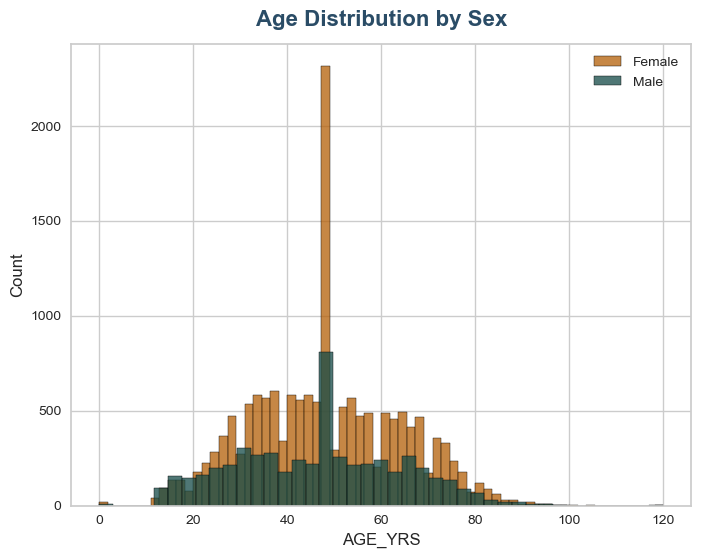

In [99]:
plt.subplots(figsize=(8,6), dpi=100)
sns.histplot( df.loc[df.SEX=='F', "AGE_YRS"] , color="#b45f06", label="Female")
sns.histplot( df.loc[df.SEX=='M', "AGE_YRS"] , color="#144a47", label="Male")

plt.title('Age Distribution by Sex', fontsize=16, weight='bold', y=1.02,color='#2a4c66' );
plt.legend();

### Vaccine Manufacturers

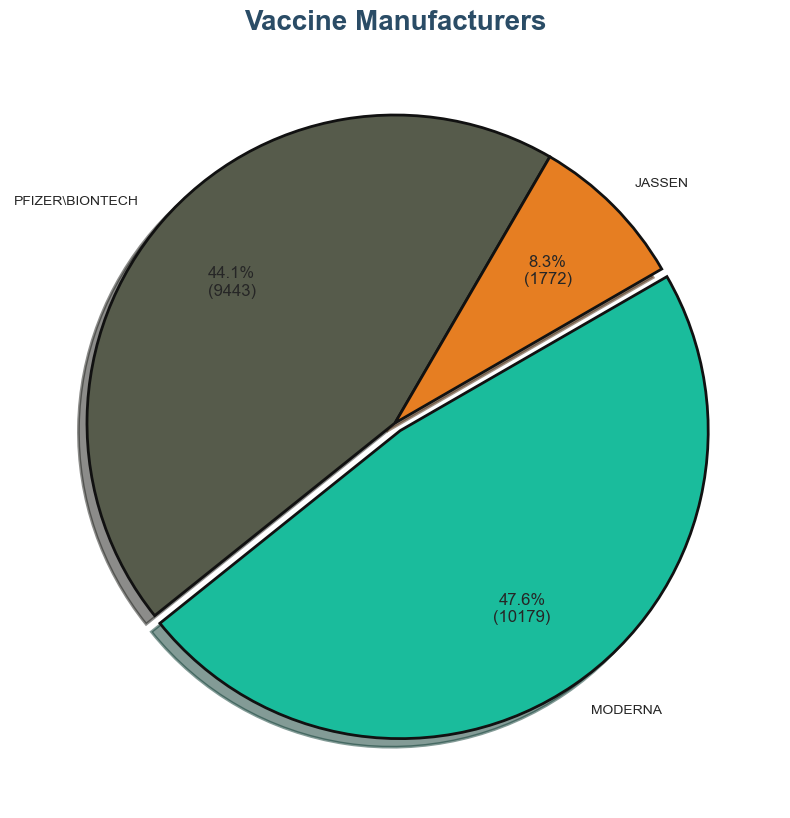

In [100]:
plt.figure(figsize=(20,10))
labels = ["MODERNA", "PFIZER\BIONTECH", "JASSEN",]
colors = ["#1abc9c", "#565b4b", "#e67e22",]
explode = [0.03,0.0,0.0]
wedge_properties = {"edgecolor":"k",'linewidth': 2}

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

plt.pie(df['VAX_MANU'].value_counts(), labels=labels, explode=explode, colors=colors, startangle=30,
           counterclock=False, shadow=True, wedgeprops=wedge_properties,
           autopct=autopct_format(df['VAX_MANU'].value_counts()), pctdistance=0.7)

plt.title("Vaccine Manufacturers", fontsize=20, weight='bold',color='#2a4c66')
plt.show()

### Vaccine Dose Series

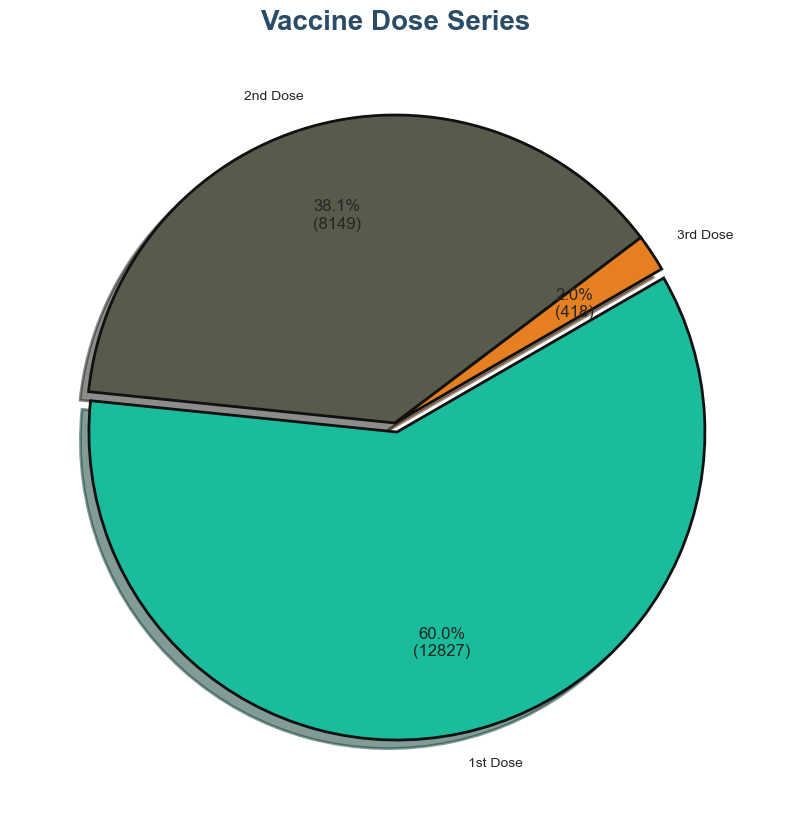

In [101]:
plt.figure(figsize=(20,10))
labels = ["1st Dose", "2nd Dose", "3rd Dose",]
colors = ["#1abc9c", "#565b4b", "#e67e22",]
explode = [0.03,0.0,0.0]
wedge_properties = {"edgecolor":"k",'linewidth': 2}

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

plt.pie(df['VAX_DOSE_SERIES'].value_counts(), labels=labels, explode=explode, colors=colors, startangle=30,
           counterclock=False, shadow=True, wedgeprops=wedge_properties,
           autopct=autopct_format(df['VAX_DOSE_SERIES'].value_counts()), pctdistance=0.7)
plt.title("Vaccine Dose Series", fontsize=20, weight='bold',color='#2a4c66')
plt.show()

### Age Distribution by Vaccination Type

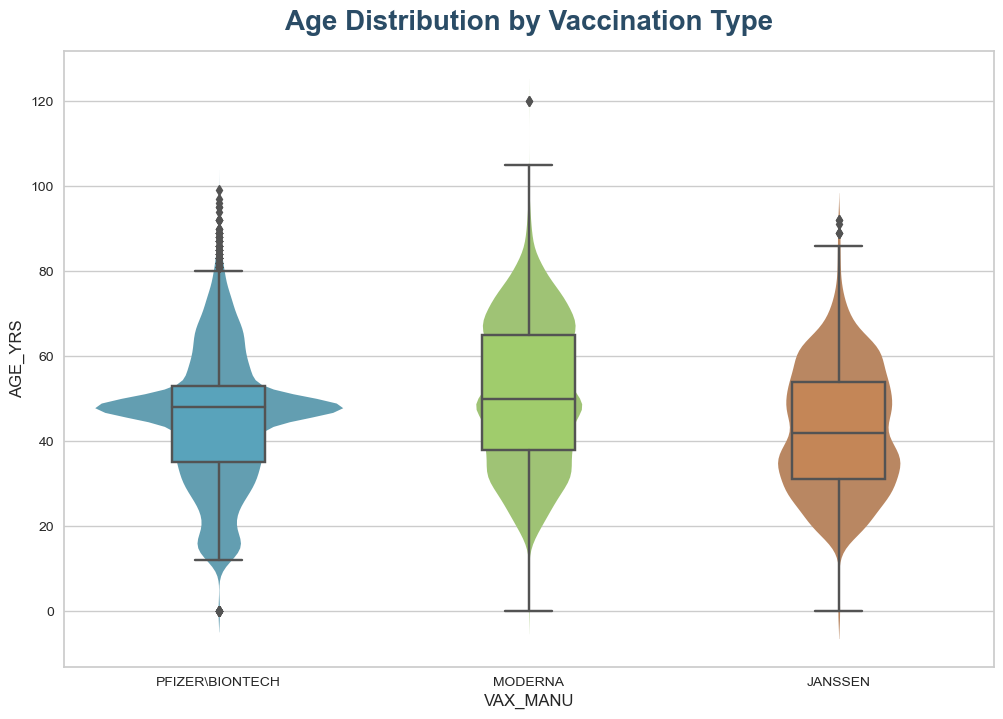

In [102]:
plt.figure(figsize=(12,8))

ax = sns.violinplot(x='VAX_MANU',y='AGE_YRS',data=df,
                    palette='turbo', inner=None, linewidth=0, saturation=0.4)

sns.boxplot(x='VAX_MANU',y='AGE_YRS',data=df, palette ='turbo',ax=ax,boxprops={'zorder': 2},
                     saturation=0.5, width=0.3)


plt.title("Age Distribution by Vaccination Type",fontsize=20, weight='bold', y=1.02,color='#2a4c66');

### Vaccination Type by Age by Sex

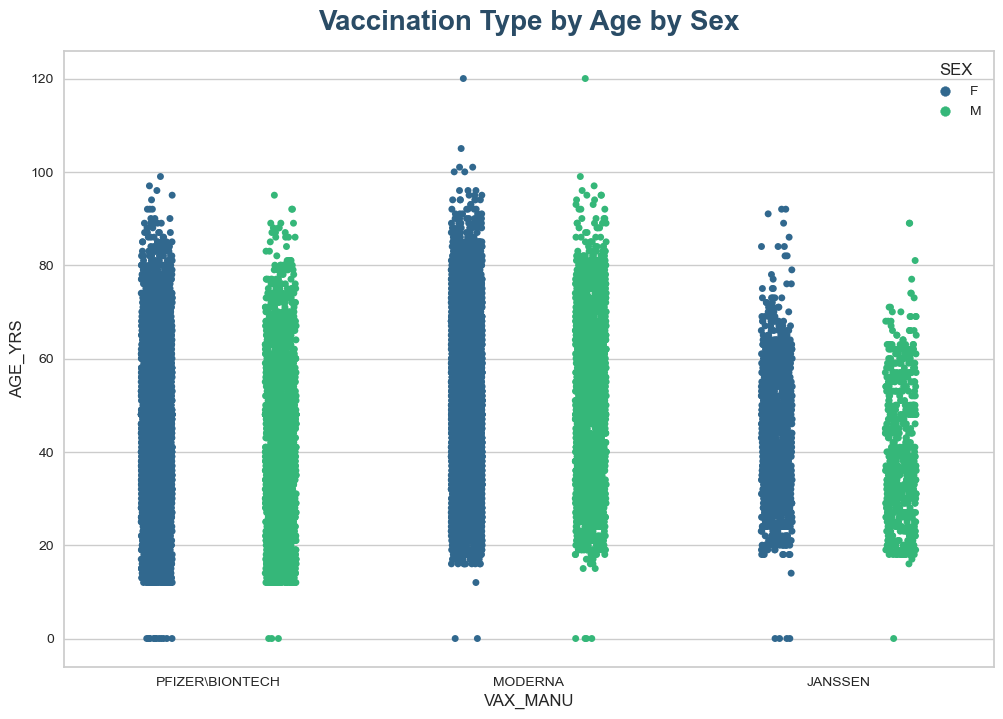

In [103]:
plt.figure(figsize=(12,8))
sns.stripplot(x='VAX_MANU',y='AGE_YRS', data=(df.loc[df['VAX_MANU']!='UNKNOWN MANUFACTURER']), 
               jitter=True,hue='SEX', dodge=True, palette='viridis')
plt.title("Vaccination Type by Age by Sex",fontsize=20, weight='bold', y=1.02,color='#2a4c66')
plt.show();

### Top 10 Symptoms Per Symptom Feature - Pie Chart
These piecharts show the top ten symptoms in order as listed by the medical practitioner when a person was advising of an adverse effect to the covid 19 vaccine.

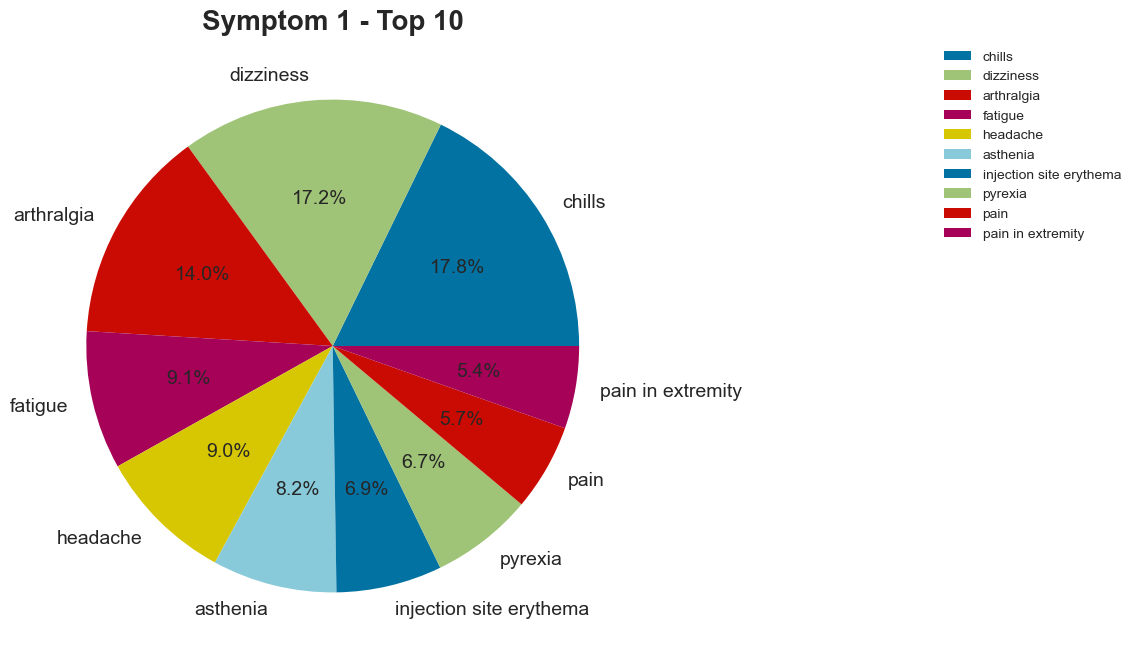

In [104]:
plt.figure(figsize=(16,8))
ax = df['SYMPTOM1'].value_counts().nlargest(10).plot(kind='pie', fontsize=14, autopct='%1.1f%%', legend = True, label='')
ax.set_title("Symptom 1 - Top 10", fontsize=20, weight='bold')
plt.legend(loc="best", bbox_to_anchor=(1.3, 0.5, 0.5, 0.5));

### Died - Pie Chart
In order to plot the pie chart for whether a person died, we fist had to fill the nan values with 0 and 'Y' value as 1. We can see that 1.1% of patients who reported an adverse effect to the vaccine eventually died.

In [105]:
df['DIED'] = df['DIED'].fillna(0)

In [106]:
df['DIED'] = df["DIED"].replace({'Y': '1'})

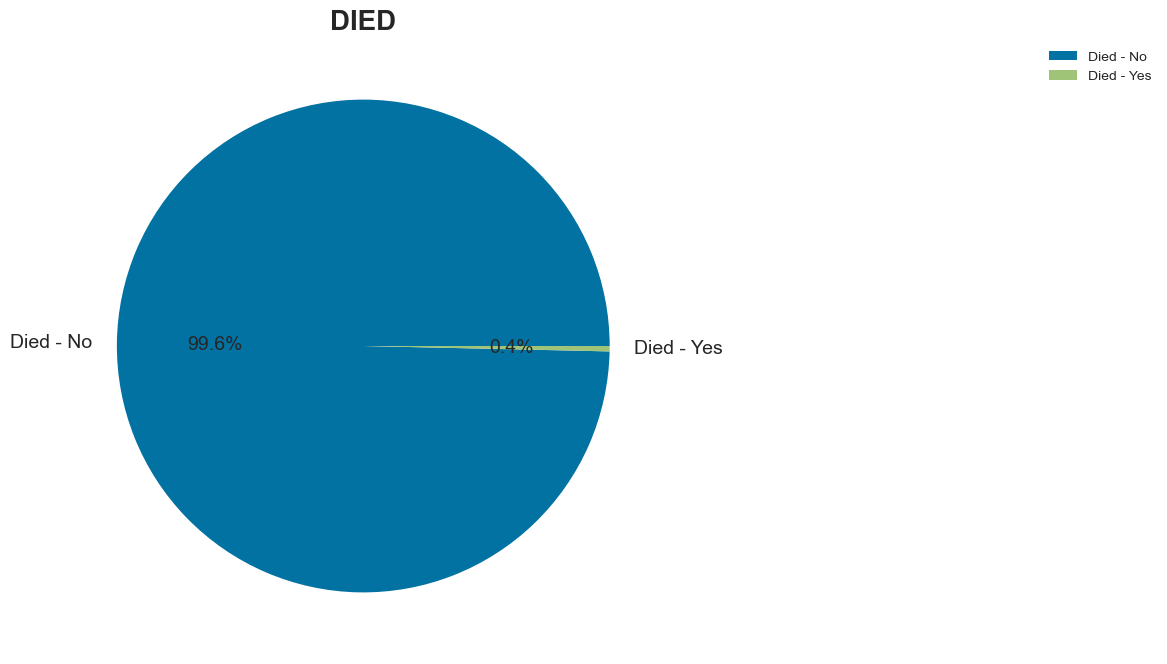

In [107]:
labels = ['Died - No', 'Died - Yes']
plt.figure(figsize=(16,8))
ax = df['DIED'].value_counts().plot(kind='pie', fontsize=14, autopct='%1.1f%%', legend = True, labels=labels, label='')
ax.set_title("DIED", fontsize=20, weight='bold')
plt.legend(loc="best", bbox_to_anchor=(1.3, 0.5, 0.5, 0.5));

### Top Vaccine Manufacturers - Pie Chart

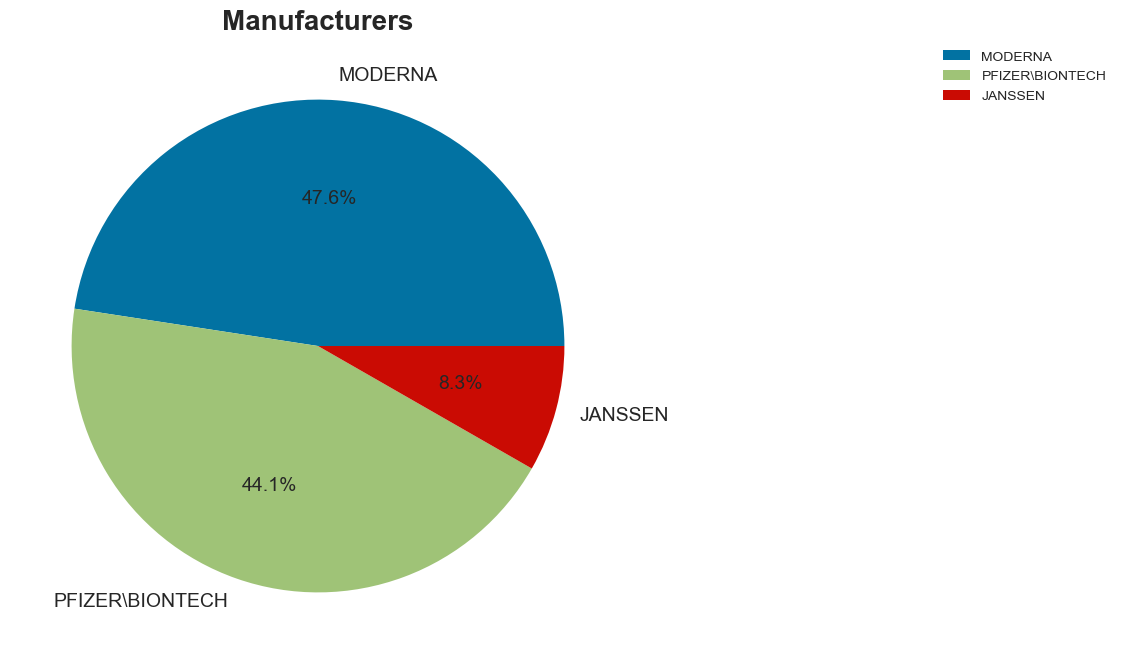

In [108]:
plt.figure(figsize=(16,8))
ax = df['VAX_MANU'].value_counts().plot(kind='pie', fontsize=14, autopct='%1.1f%%', legend = True, label='')
ax.set_title("Manufacturers", fontsize=20, weight='bold')
plt.legend(loc="best", bbox_to_anchor=(1.3, 0.5, 0.5, 0.5));

### Vaccine Manufacturer - Count Plot

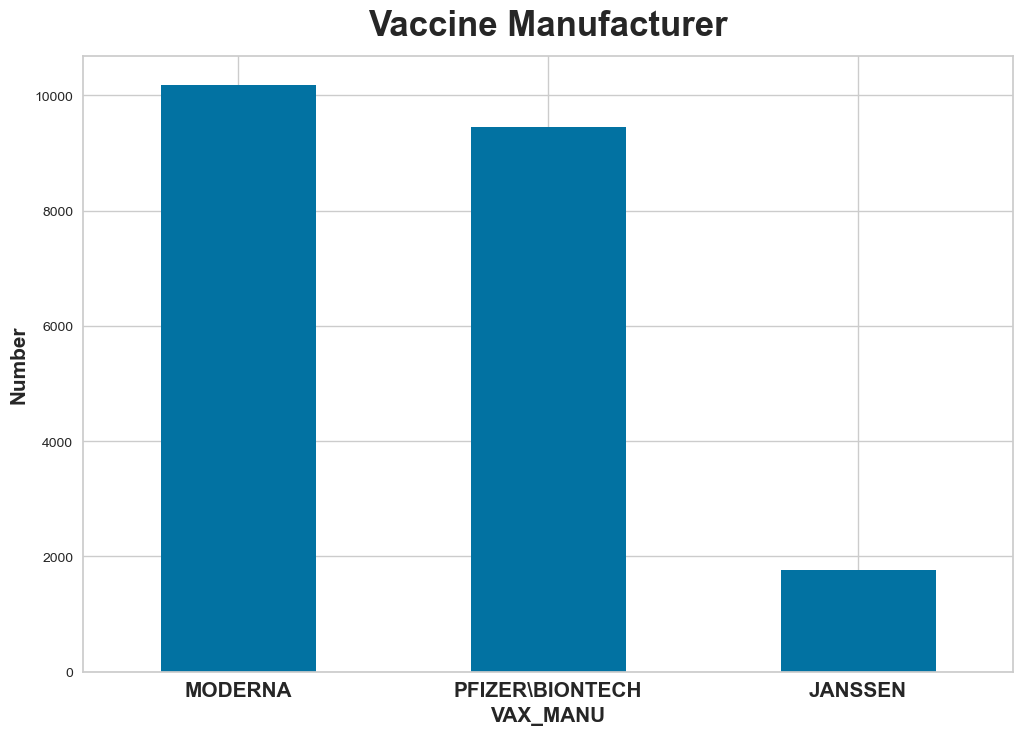

In [109]:
df['VAX_MANU'].value_counts().plot(kind='bar', figsize=(12,8));
plt.ylabel('Number', fontsize=15, weight='bold')
plt.xlabel('VAX_MANU', fontsize=15, weight='bold')
plt.xticks(fontsize=15, weight='bold', rotation = 0)
plt.title('Vaccine Manufacturer', fontsize=25, weight='bold', y=1.02);

### Sex - Pie Chart

We can see that females account for the majority of persons detailing an adverse effect

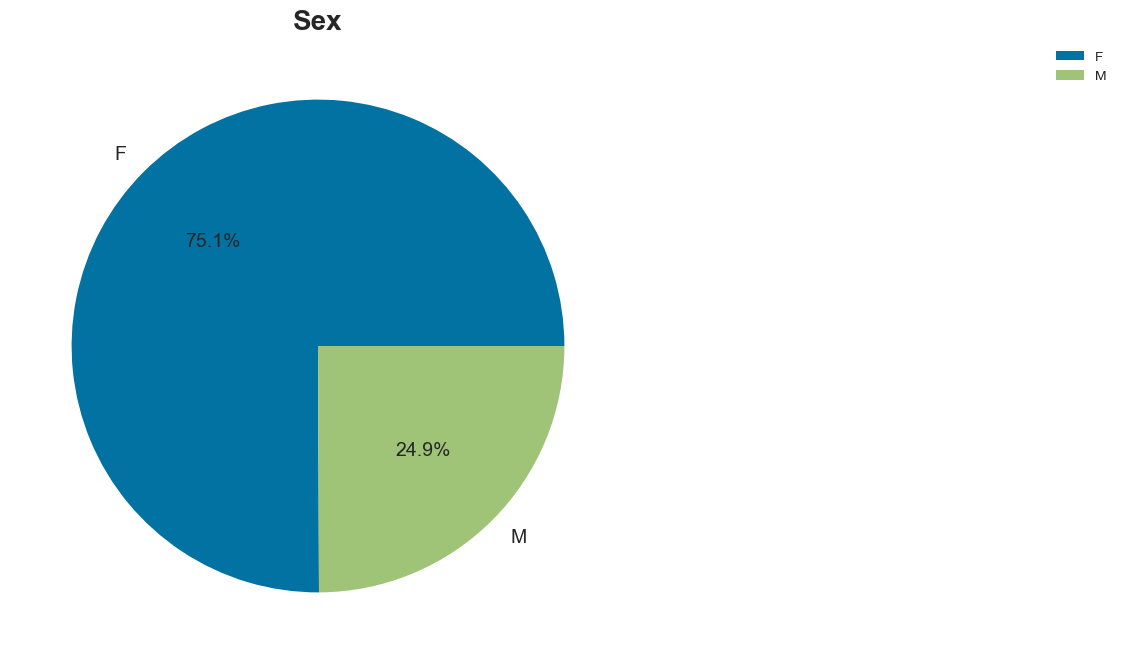

In [110]:
plt.figure(figsize=(16,8))
ax = df['SEX'].value_counts().plot(kind='pie', fontsize=14, autopct='%1.1f%%', legend = True, label='')
ax.set_title("Sex", fontsize=20, weight='bold')
plt.legend(loc="best", bbox_to_anchor=(1.3, 0.5, 0.5, 0.5));

### Sex - Count Plot

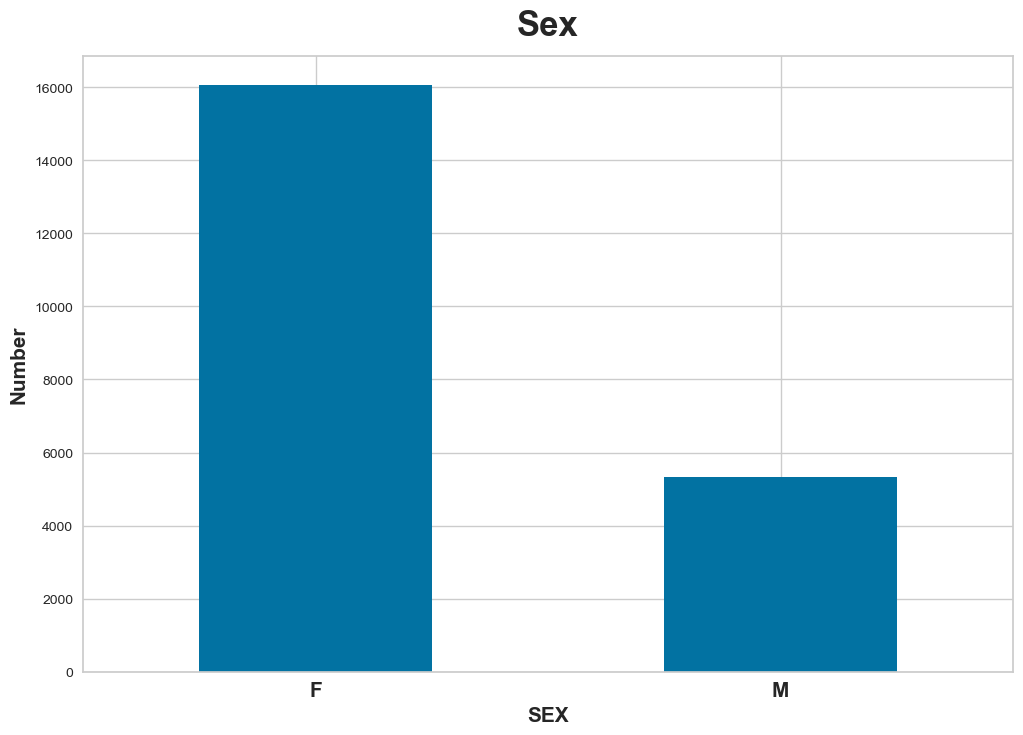

In [111]:
df['SEX'].value_counts().plot(kind='bar', figsize=(12,8));
plt.ylabel('Number', fontsize=15, weight='bold')
plt.xlabel('SEX', fontsize=15, weight='bold')
plt.xticks(fontsize=15, weight='bold', rotation = 0)
plt.title('Sex', fontsize=25, weight='bold', y=1.02);

### Hospital Days - Piechart
We can see that if a person spent time in hospital that two days was the most time spent.

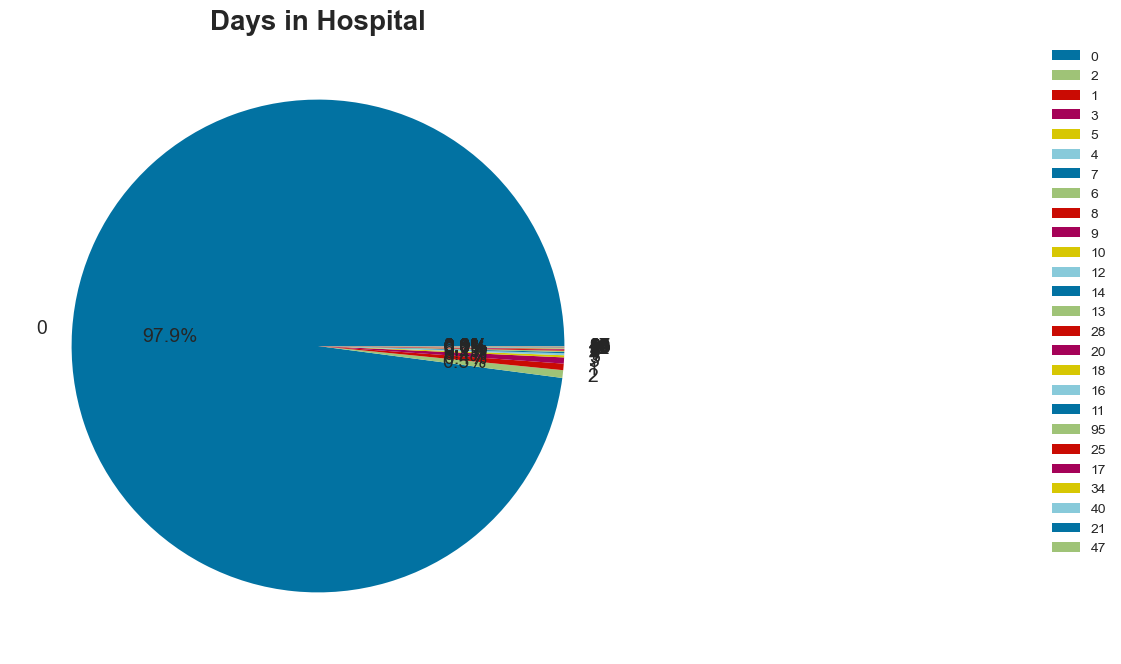

In [112]:
plt.figure(figsize=(16,8))
ax = df['HOSPDAYS'].value_counts().plot(kind='pie', fontsize=14, autopct='%1.1f%%', legend = True, label='')
ax.set_title("Days in Hospital", fontsize=20, weight='bold')
plt.legend(loc="best", bbox_to_anchor=(1.3, 0.5, 0.5, 0.5));

### Distribution of Ages - Histogram
The distribution of ages of persons reporting an adverse effect to the covid 19 vaccine.

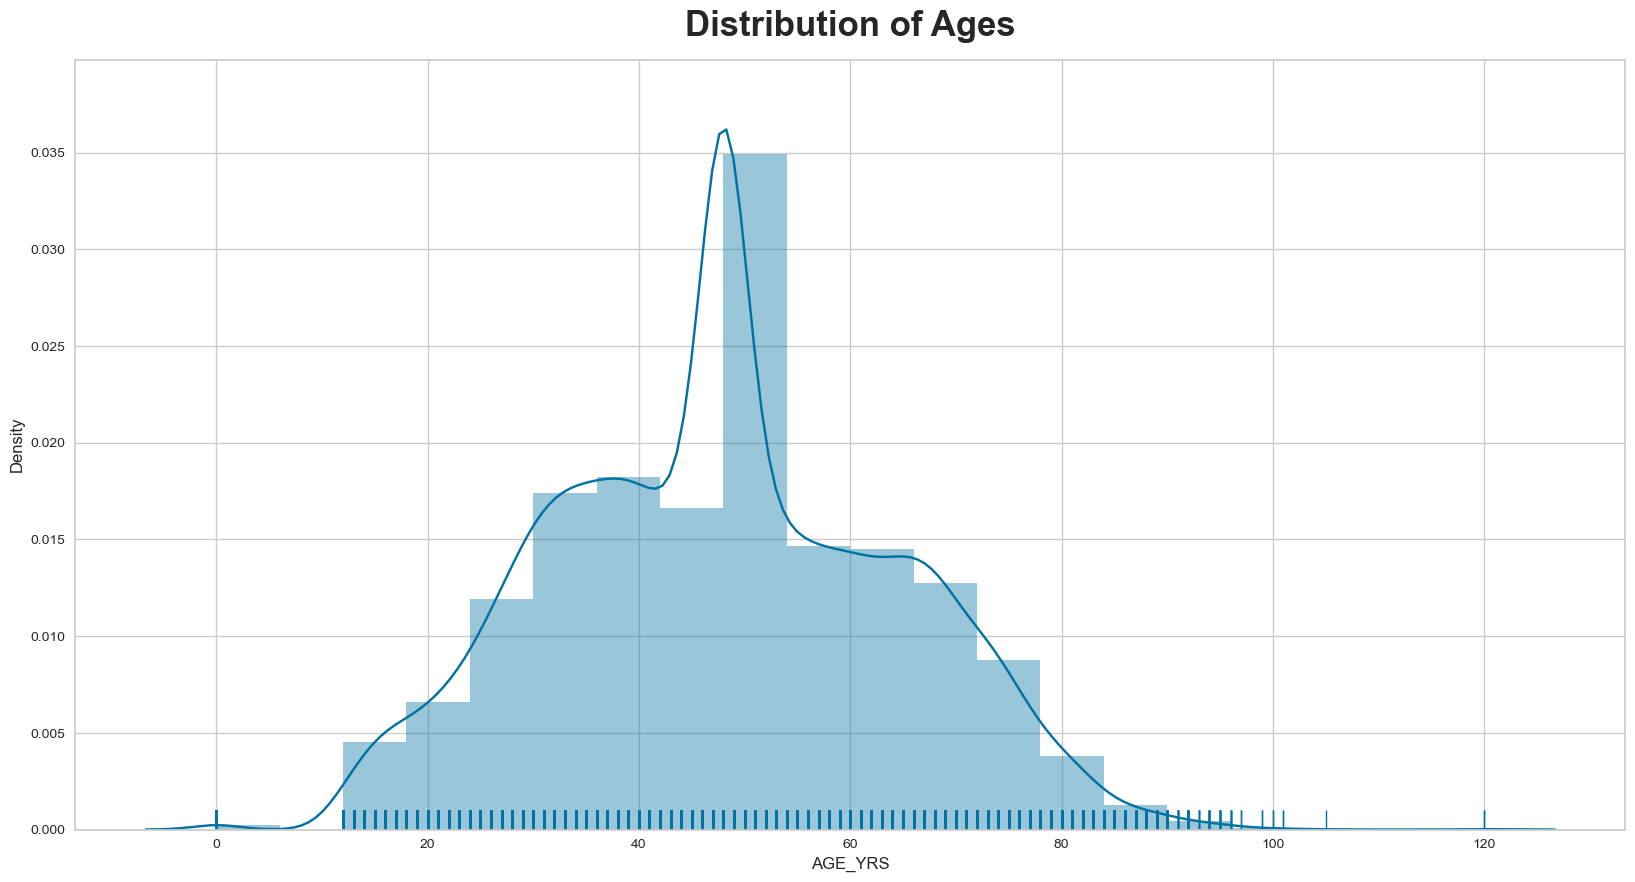

In [113]:
plt.figure(figsize=(20,10))
sns.distplot(df['AGE_YRS'], kde=True, bins=20, rug=True)
plt.title('Distribution of Ages', fontsize=25, weight='bold', y=1.02);

### Distribution of Ages - Boxplot

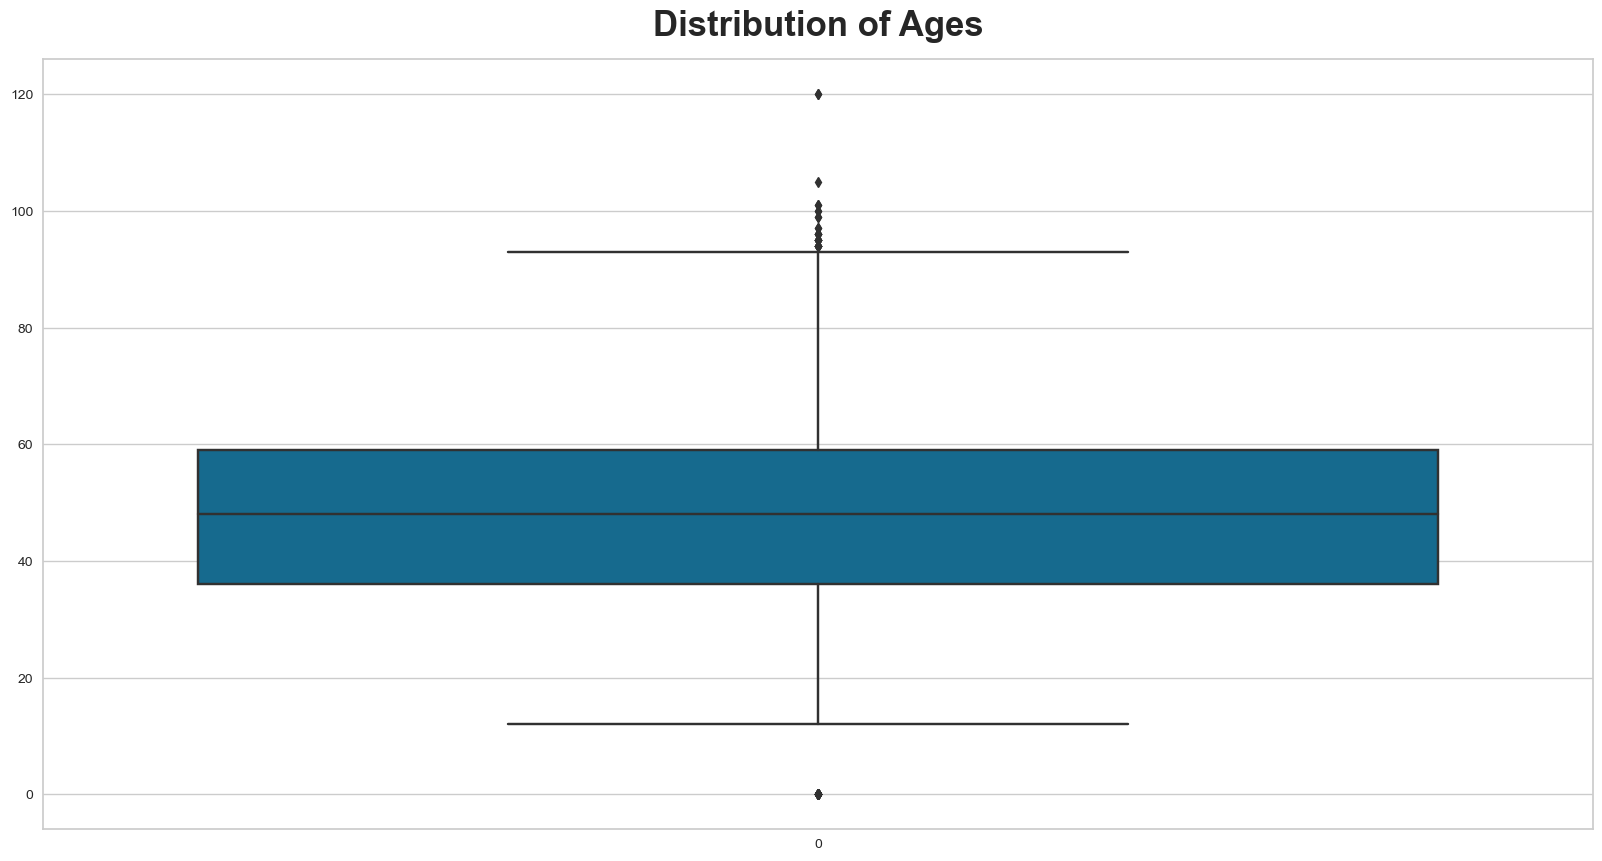

In [114]:
plt.figure(figsize=(20,10))
sns.boxplot(df['AGE_YRS'])
plt.title('Distribution of Ages', fontsize=25, weight='bold', y=1.02);

### Distribution of days in hospital - Histogram

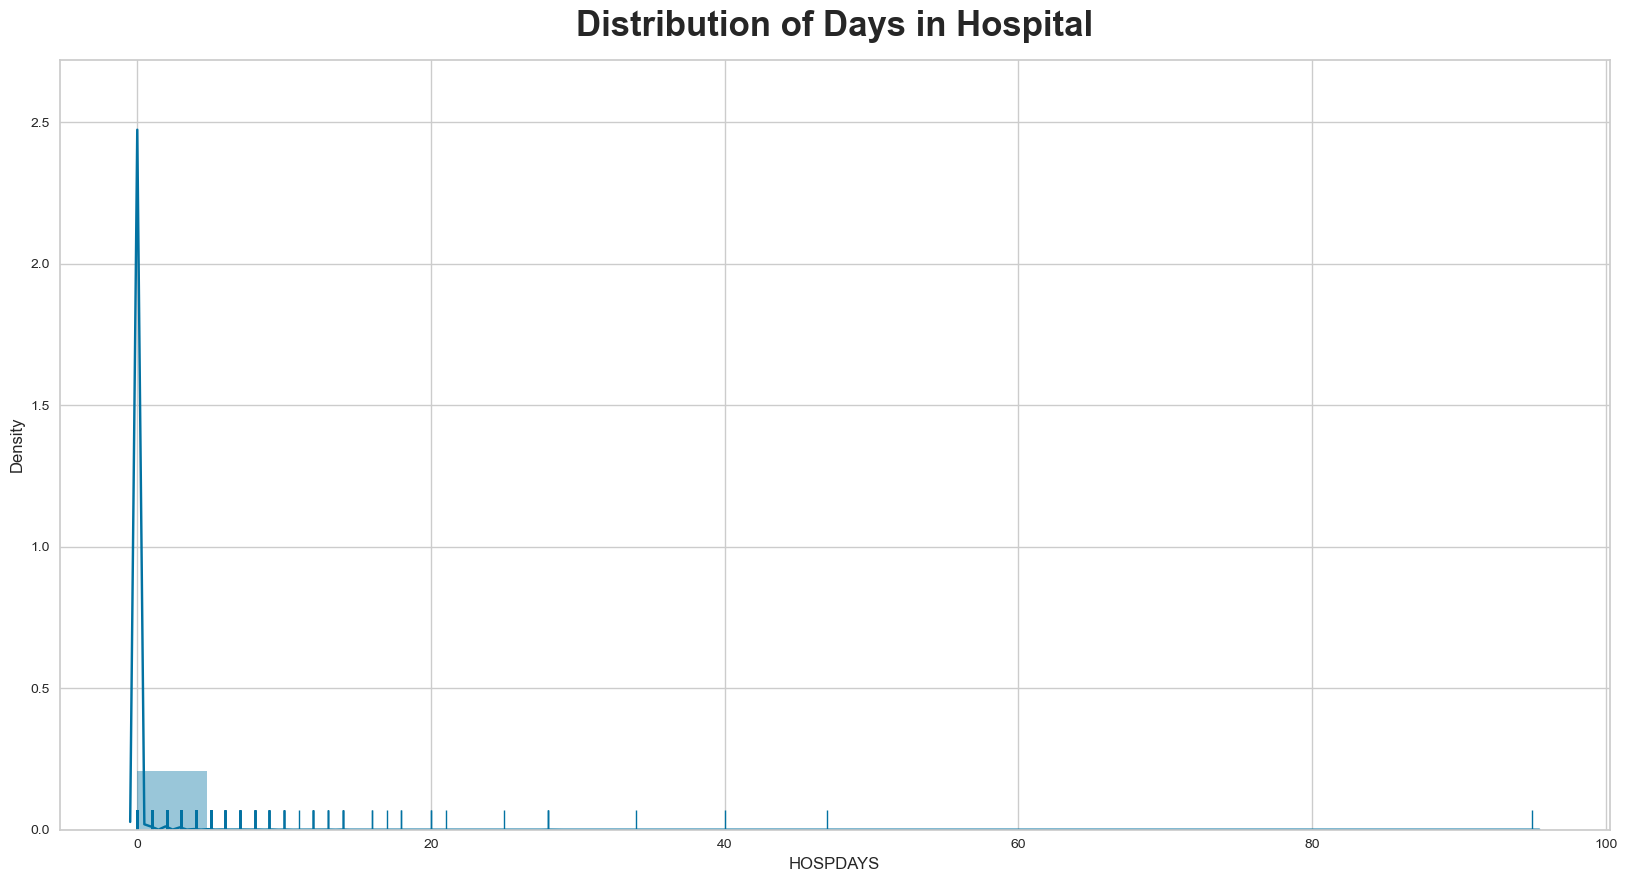

In [115]:
plt.figure(figsize=(20,10))
sns.distplot(df['HOSPDAYS'], kde=True, bins=20, rug=True)
plt.title('Distribution of Days in Hospital', fontsize=25, weight='bold', y=1.02);

### Distribution of days in hospital - Boxplot

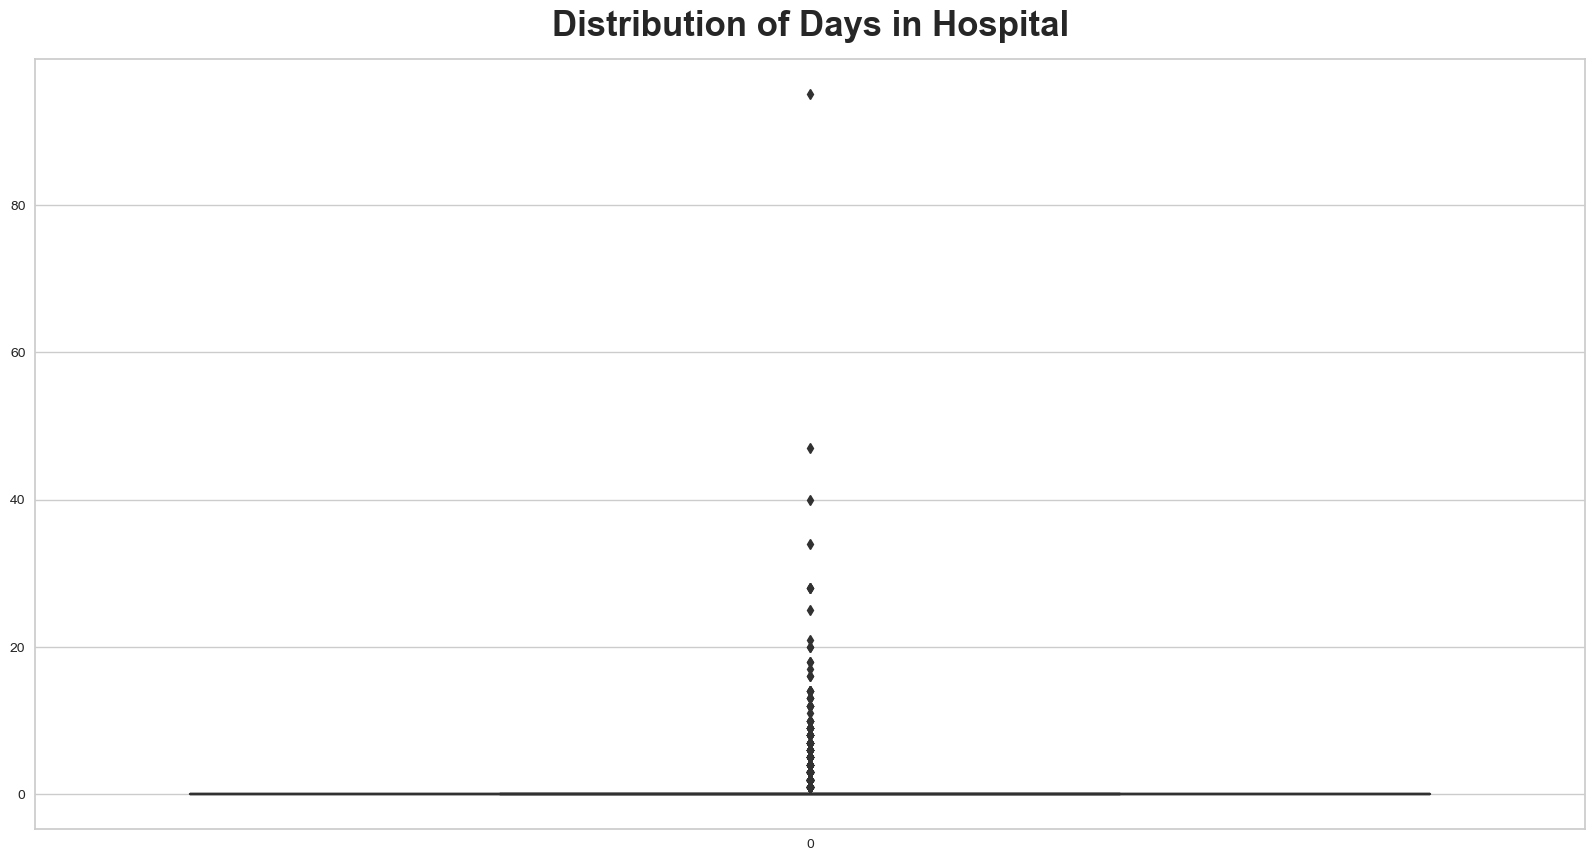

In [116]:
plt.figure(figsize=(20,10))
sns.boxplot(df['HOSPDAYS'])
plt.title('Distribution of Days in Hospital', fontsize=25, weight='bold', y=1.02);

### Correlations

#### Heatmap

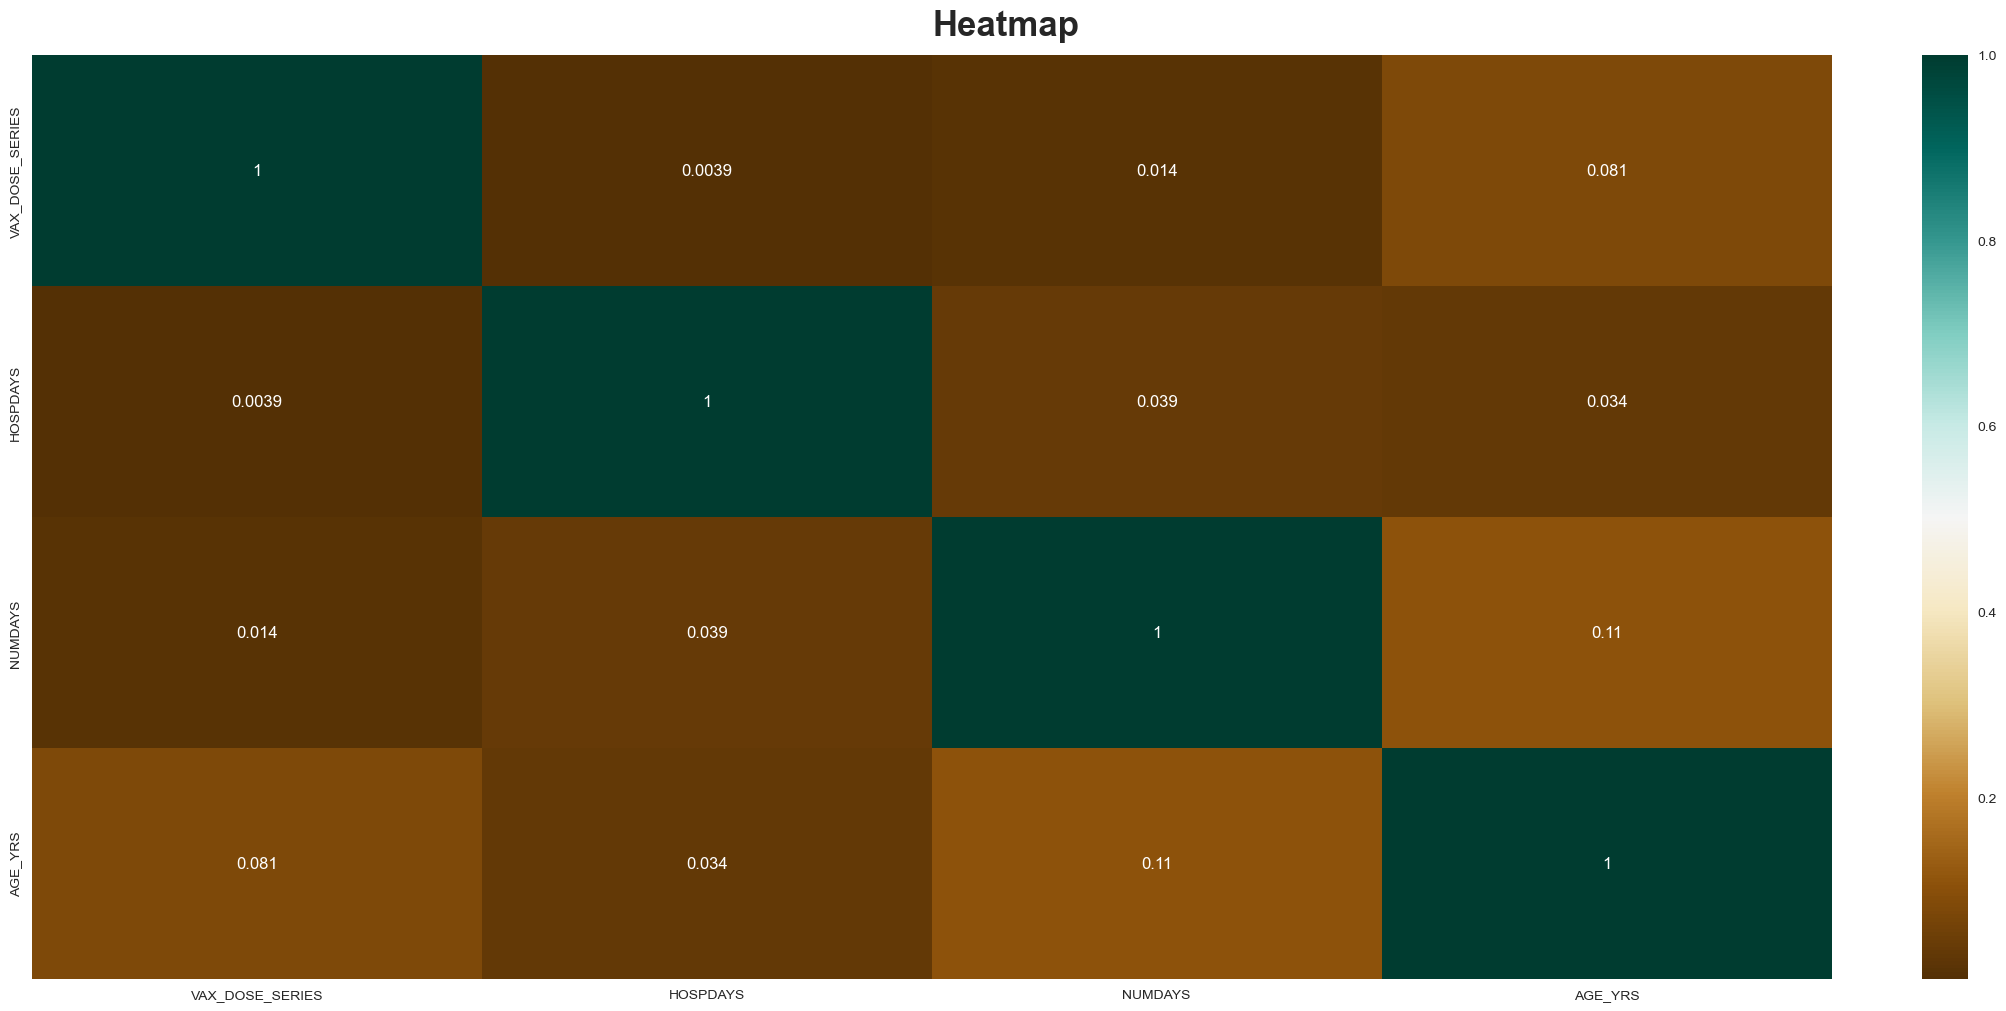

In [117]:
plt.figure(constrained_layout=True, figsize=(20,10))
c = df.corr()
sns.heatmap(c, cmap='BrBG', annot = True)
plt.suptitle("Heatmap", fontsize=25, weight='bold');

### Statistical Summary of Numerical Features

In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VAX_DOSE_SERIES,21394.0,1.419978,0.531682,1.0,1.0,1.0,2.0,3.0
HOSPDAYS,21394.0,0.094512,1.157832,0.0,0.0,0.0,0.0,95.0
NUMDAYS,21394.0,5.077732,17.046618,0.0,0.0,1.0,3.0,365.0
AGE_YRS,21394.0,47.793213,16.363622,0.0,36.0,48.0,59.0,120.0


### Statistical Summary of Categorical Features

In [119]:
df.describe(include=object).T

,count,unique,top,freq
SYMPTOM1,21394,20,chills,2894
VAX_MANU,21394,3,MODERNA,10179
VAX_ROUTE,21394,3,IM,13612
VAX_SITE,21394,3,LA,17208
STATE,21394,1,CA,21394
SEX,21394,2,F,16059
DIED,21394,2,N,21319
L_THREAT,21394,2,N,21206
HOSPITAL,21394,2,N,20865
DISABLE,21394,2,N,21018


### 3. Data Preparation
### How many days will a person spend in hospital?
I will be seeking to predict how many days a person will spend in hospital (if any days) after they advise they have had an adverse symptom to the Covid 19 vaccine. From looking at the data dictionary, I will drop the features I don't believe are necessary to complete the regression prediction problem i.e. I will initially concentrate on the features I believe are important for completing this regression problem. I believe it is easier to choose the features I require than drop the features I don't require. This reduces the number of features from 52 to 7.

#### Shape before removing features

In [120]:
df.shape

(21394, 18)

### Number of missing values per feature
We will now check how missing values are in our remaining features and then decide whether to drop them or replace them with a meaningful value.

In [121]:
count_missing = ((df.isnull().sum()).sort_values(ascending=True))
count_missing

SYMPTOM1           0
OFC_VISIT          0
NUMDAYS            0
RECOVD             0
DISABLE            0
TODAYS_DATE        0
HOSPDAYS           0
HOSPITAL           0
L_THREAT           0
DIED               0
SEX                0
STATE              0
VAX_SITE           0
VAX_ROUTE          0
VAX_DOSE_SERIES    0
VAX_MANU           0
ER_ED_VISIT        0
AGE_YRS            0
dtype: int64

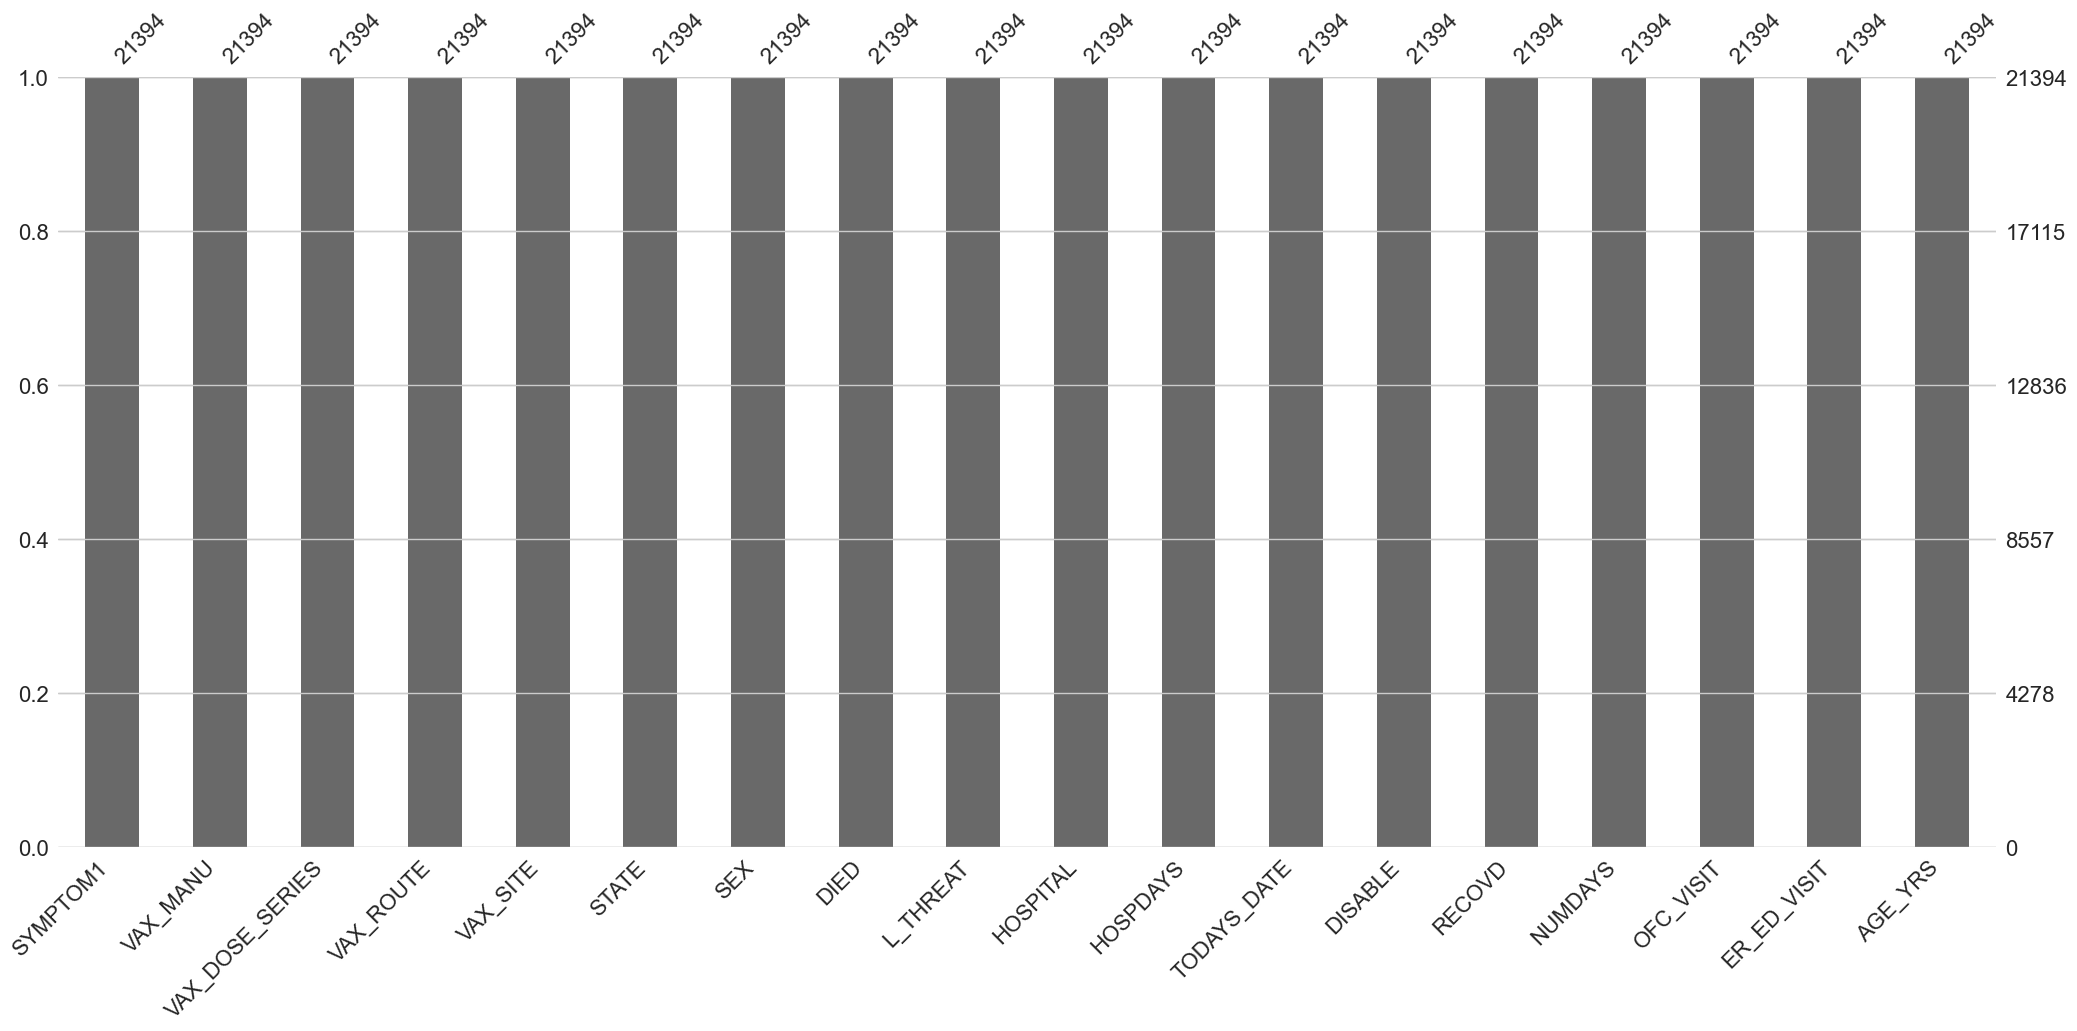

In [122]:
import missingno as msno
ax = msno.bar(df)

### Number of distinct values in each feature

In [123]:
for col in df.columns:
    print(col, ': Number of Distinct Values: ', len(df[col].unique()))

SYMPTOM1 : Number of Distinct Values:  20
VAX_MANU : Number of Distinct Values:  3
VAX_DOSE_SERIES : Number of Distinct Values:  3
VAX_ROUTE : Number of Distinct Values:  3
VAX_SITE : Number of Distinct Values:  3
STATE : Number of Distinct Values:  1
SEX : Number of Distinct Values:  2
DIED : Number of Distinct Values:  2
L_THREAT : Number of Distinct Values:  2
HOSPITAL : Number of Distinct Values:  2
HOSPDAYS : Number of Distinct Values:  26
TODAYS_DATE : Number of Distinct Values:  309
DISABLE : Number of Distinct Values:  2
RECOVD : Number of Distinct Values:  2
NUMDAYS : Number of Distinct Values:  162
OFC_VISIT : Number of Distinct Values:  2
ER_ED_VISIT : Number of Distinct Values:  2
AGE_YRS : Number of Distinct Values:  92


### Print the distinct values in each feature.

In [124]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  SYMPTOM1 :
['chills' 'injection site erythema' 'fatigue' 'pyrexia' 'arthralgia'
 'asthenia' 'rash' 'headache' 'hypoaesthesia' 'injection site pain' 'pain'
 'dizziness' 'nausea' 'pruritus' 'paraesthesia' 'pain in extremity'
 'dyspnoea' 'vomiting' 'myalgia' 'hyperhidrosis']


COLUMN NAME:  VAX_MANU :
['PFIZER\\BIONTECH' 'MODERNA' 'JANSSEN']


COLUMN NAME:  VAX_DOSE_SERIES :
[1 2 3]


COLUMN NAME:  VAX_ROUTE :
['IM' 'SYR' 'OT']


COLUMN NAME:  VAX_SITE :
['LA' 'RA' 'AR']


COLUMN NAME:  STATE :
['CA']


COLUMN NAME:  SEX :
['F' 'M']


COLUMN NAME:  DIED :
['N' '1']


COLUMN NAME:  L_THREAT :
['N' 'Y']


COLUMN NAME:  HOSPITAL :
['N' 'Y']


COLUMN NAME:  HOSPDAYS :
[ 0  7  2  1 10  4  3  6  5  8 14  9 20 25 18 21 40 16 34 17 95 13 12 11
 28 47]


COLUMN NAME:  TODAYS_DATE :
['2021-01-01T00:00:00.000000000' '2021-01-02T00:00:00.000000000'
 '2021-01-03T00:00:00.000000000' '2021-01-04T00:00:00.000000000'
 '2021-01-05T00:00:00.000000000' '2021-01-06T00:00:00.000000000'
 '2021-01-

### Top values in the symptoms
We will use an underscore to join individual words in the symptoms features for the future machine learning model to enable encoding and use the code str.replace to achieve this task.

In [125]:
df['SYMPTOM1'].value_counts().nlargest(15)

chills                     2894
dizziness                  2805
arthralgia                 2288
fatigue                    1479
headache                   1458
asthenia                   1331
injection site erythema    1131
pyrexia                    1092
pain                        927
pain in extremity           882
nausea                      787
rash                        714
pruritus                    624
injection site pain         572
hypoaesthesia               555
Name: SYMPTOM1, dtype: int64

### Values in each feature of our new DataFrame¶

In [126]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  SYMPTOM1 :
['chills' 'injection site erythema' 'fatigue' 'pyrexia' 'arthralgia'
 'asthenia' 'rash' 'headache' 'hypoaesthesia' 'injection site pain' 'pain'
 'dizziness' 'nausea' 'pruritus' 'paraesthesia' 'pain in extremity'
 'dyspnoea' 'vomiting' 'myalgia' 'hyperhidrosis']


COLUMN NAME:  VAX_MANU :
['PFIZER\\BIONTECH' 'MODERNA' 'JANSSEN']


COLUMN NAME:  VAX_DOSE_SERIES :
[1 2 3]


COLUMN NAME:  VAX_ROUTE :
['IM' 'SYR' 'OT']


COLUMN NAME:  VAX_SITE :
['LA' 'RA' 'AR']


COLUMN NAME:  STATE :
['CA']


COLUMN NAME:  SEX :
['F' 'M']


COLUMN NAME:  DIED :
['N' '1']


COLUMN NAME:  L_THREAT :
['N' 'Y']


COLUMN NAME:  HOSPITAL :
['N' 'Y']


COLUMN NAME:  HOSPDAYS :
[ 0  7  2  1 10  4  3  6  5  8 14  9 20 25 18 21 40 16 34 17 95 13 12 11
 28 47]


COLUMN NAME:  TODAYS_DATE :
['2021-01-01T00:00:00.000000000' '2021-01-02T00:00:00.000000000'
 '2021-01-03T00:00:00.000000000' '2021-01-04T00:00:00.000000000'
 '2021-01-05T00:00:00.000000000' '2021-01-06T00:00:00.000000000'
 '2021-01-

### 4. Data Splitting

Step 1 - Define X and y

Define X and y. Separate the dependent or target variable (y) and the independent variables (X) and convert them into arrays using values as ML algoritms require arrays. I am looking to predict the number of days a person will stay in hospital after reporting an adverse effect ot the covid 19 vaccine so the 'y' variable will be HOSPDAYS. The 'X' features are the features that will feed into our target feature.

In [187]:
X= df.iloc[:, 1:47].values
y = df.filter(["HOSPDAYS"])

### Process the Data

In [188]:
y.value_counts()

HOSPDAYS  
-0.081631     20951
 1.645777       108
 0.782073        91
 2.509480        86
 4.236888        30
 3.373184        28
 5.100591        17
 5.964295        17
 6.827999        15
 7.691703        12
 8.555406         7
 10.282814        6
 12.010221        5
 11.146517        4
 24.102073        3
 13.737629        2
 15.465036        2
 17.192443        2
 9.419110         1
 14.601332        1
 18.056147        1
 21.510962        1
 29.284295        1
 34.466517        1
 40.512443        1
 81.970221        1
dtype: int64

In [192]:
X_numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21394 entries, 0 to 21393
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAX_DOSE_SERIES  21394 non-null  int64  
 1   HOSPDAYS         21394 non-null  float64
 2   NUMDAYS          21394 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 501.5 KB


In [193]:
X_categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21394 entries, 0 to 21393
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21394 non-null  float64
 1   1       21394 non-null  float64
 2   2       21394 non-null  float64
 3   3       21394 non-null  float64
 4   4       21394 non-null  float64
 5   5       21394 non-null  float64
 6   6       21394 non-null  float64
 7   7       21394 non-null  float64
 8   8       21394 non-null  float64
 9   9       21394 non-null  float64
 10  10      21394 non-null  float64
 11  11      21394 non-null  float64
 12  12      21394 non-null  float64
 13  13      21394 non-null  float64
 14  14      21394 non-null  float64
 15  15      21394 non-null  float64
 16  16      21394 non-null  float64
 17  17      21394 non-null  float64
 18  18      21394 non-null  float64
 19  19      21394 non-null  float64
 20  20      21394 non-null  float64
 21  21      21394 non-null  float64
 22

In [194]:
enc = preprocessing.OneHotEncoder()
X_categoricals = pd.DataFrame(enc.fit_transform(X_categoricals).toarray()).reset_index(drop=True)

In [195]:
X = pd.concat([X_categoricals, X_numericals], axis= 1).reset_index(drop=True)

In [196]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in y_test:", y_test.isnull().sum())

Missing values in y_train: HOSPDAYS    0
dtype: int64
Missing values in y_test: HOSPDAYS    0
dtype: int64


#### Step 3 - Normalization

I will now normalize the numerical features to ensure that they have similar scales for training neural networks effectively

In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
numerical_features = ['HOSPDAYS', 'AGE_YRS']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


### Create a Feedforward Neural Network or Multilayer perceptrons (MLPs)
I will apply feedforward neural network due to its versatability to be adapted to various regression problems by adjusting the network architecture, loss function and optimization strategy to suit my problem requirements. My problem is:  to predict how many days a person will spend in hospital (if any days) after they advise they have had an adverse symptom to the Covid 19 vaccine.

In [200]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.metrics import mean_squared_error

 Sequential models are simple and easy to understand, especially for beginners in deep learning. They have a linear stack of layers, where each layer feeds its output to the next layer in sequence. This simplicity makes them a good choice for many common tasks.

In [201]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  
])

In [202]:
X_train = X_train.astype(np.float64)
y_train = y_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_test = y_test.astype(np.float64)

In [203]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

### Evaluating the Model
Performance estimation/ evaluation is a process of estimating the loss that a predictive model/ algorithm will incur on the unseen data. This is fundamental stage at any machine learning project (Cerqueira, Torgo and Mozetič, 2020). Time series forecasting is a specific type of predictive modeling because it uses historical data to predict trends in a particular time in the future(Kumar, 2022). Mean Absolute Percentage Error (MAPE) is the most wide used metric for forecast accuracy. It uses the percentage error which is scale independent of the series (Kumar, 2020).

In [204]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

134/134 [==============================] - 0s 2ms/step - loss: 5.2951
Test Loss: 5.295081615447998


In [205]:
def create_and_train_model(hidden_units, learning_rate):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_train.shape[1],)))
    
    for units in hidden_units:
        model.add(keras.layers.Dense(units=units, activation='relu'))
    
    model.add(keras.layers.Dense(units=1))  
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)

Epoch 1/10
535/535 [==============================] - 2s 2ms/step - loss: 0.3297
Epoch 2/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0542
Epoch 3/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0162
Epoch 4/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 5/10
535/535 [==============================] - 1s 3ms/step - loss: 0.0051
Epoch 6/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0045
Epoch 7/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0048
Epoch 8/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0046
Epoch 9/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0154
Epoch 10/10
134/134 [==============================] - 0s 1ms/step - loss: 0.0019
Training accuracy: 0.0022941764909774065
Testing accuracy: 0.0019296370446681976


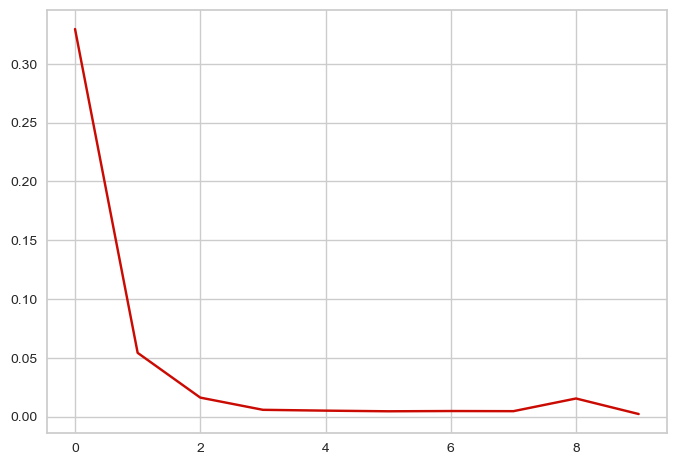

In [206]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32)


train_acc = model.evaluate(X_train, y_train, batch_size=32)
test_acc = model.evaluate(X_test, y_test, batch_size=32)
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### Pipeline and Gridsearch

In [220]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [221]:
ML1  = [
linear_model.LogisticRegression(),     
]

ML1_columns = []
ML1_compare =pd.DataFrame(columns = ML1_columns)

In [222]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.8683392597985e-30


In [235]:
# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the Linear Regression model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate regression evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Store the evaluation metrics in the DataFrame
ML1_compare.loc[row_index, 'ML used 1'] = "LinearRegression"
ML1_compare.loc[row_index, 'Mean Squared Error'] = mse
ML1_compare.loc[row_index, 'Mean Absolute Error'] = mae
ML1_compare.loc[row_index, 'R-squared'] = r2

# Sort the DataFrame by R-squared in descending order
ML1_compare.sort_values(by=['R-squared'], ascending=False, inplace=True)

# Display the evaluation metrics
ML1_compare



,ML used 1,Accuracy 1,Recall 1,Precision 1,F1 Score 1,Cross Val Score- MAE 1,Mean Squared Error,Mean Absolute Error,R-squared
0,LinearRegression,1.0,N/A,N/A,N/A,1.254346e-15,3.868339e-30,1.254346e-15,1.0
